# Business Case: The objective is to grasp how information can be effectively utilized to decrease the likelihood of losing money when offering loans to clients.

  Assessing creditworthiness is difficult for individuals with limited credit history, posing financial risks for lenders. Ensuring accurate risk assessment is essential to protect lending institutions from the possibility of loan defaults. 

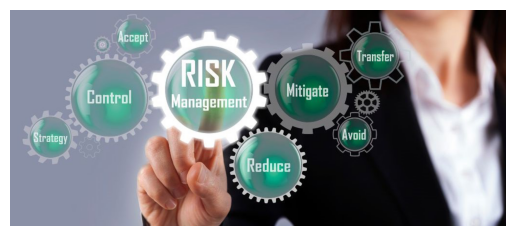

In [3]:
img=plt.imread('Financial Risk Detection 1.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
# Importing the basic libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data

# Business Objectives

The primary objective of this case study is to employ Exploratory Data Analysis (EDA) to recognize discernible patterns that signify clients encountering challenges in meeting installment payments. These identified patterns will serve as a basis for strategic decision-making, including loan denial, reduction of loan amounts, or extending loans to high-risk applicants with adjusted interest rates.The overarching goal is to refine the loan approval process, ensuring that deserving applicants are not unfairly rejected. By pinpointing individuals capable of meeting their repayment obligations, the company aims to strike a balance between minimizing defaults and providing financial assistance to deserving candidates.

# application data.csv  -  Contains client information at the time of loan application.

In [2]:
df=pd.read_csv("application_data.csv")

# Basic Checks

In [3]:
df.head()   # first five rows

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
df.tail()   # last five rows

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
307506                         NaN                        NaN   
307507                         NaN                        NaN   
307508                         0.0                        1.0   
307509                         0.0                        0.0   
307510                         0.0                        2.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
307506                        NaN                         NaN  
307507                        NaN                         NaN  
307508                        0.0                         1.0  
307509                        0.0                         0.0  
307510                        0.0                         1.0  

[5 rows x 122 columns]

In [5]:
df.shape

(307511, 122)

In [6]:
df.head((pd.set_option('display.max_columns',None)))    # display all columns from dataset

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [7]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
df.size   # the total number of elements or data points in a dataset.

37516342

In [9]:
df.describe().T  #used to view some basic statistical details like percentile, mean, std etc.

count           mean            std       min  \
SK_ID_CURR                  307511.0  278180.518577  102790.175348  100002.0   
TARGET                      307511.0       0.080729       0.272419       0.0   
CNT_CHILDREN                307511.0       0.417052       0.722121       0.0   
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279   25650.0   
AMT_CREDIT                  307511.0  599025.999706  402490.776996   45000.0   
...                              ...            ...            ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0       0.007000       0.110757       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0       0.034362       0.204685       0.0   
AMT_REQ_CREDIT_BUREAU_MON   265992.0       0.267395       0.916002       0.0   
AMT_REQ_CREDIT_BUREAU_QRT   265992.0       0.265474       0.794056       0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0       1.899974       1.869295       0.0   

                                 25%       50%       75%          max  
SK_ID_CURR                  189145.5  278202.0  367142.5     456255.0  
TARGET                           0.0       0.0       0.0          1.0  
CNT_CHILDREN                     0.0       0.0       1.0         19.0  
AMT_INCOME_TOTAL            112500.0  147150.0  202500.0  117000000.0  
AMT_CREDIT                  270000.0  513531.0  808650.0    4050000.0  
...                              ...       ...       ...          ...  
AMT_REQ_CREDIT_BUREAU_DAY        0.0       0.0       0.0          9.0  
AMT_REQ_CREDIT_BUREAU_WEEK       0.0       0.0       0.0          8.0  
AMT_REQ_CREDIT_BUREAU_MON        0.0       0.0       0.0         27.0  
AMT_REQ_CREDIT_BUREAU_QRT        0.0       0.0       0.0        261.0  
AMT_REQ_CREDIT_BUREAU_YEAR       0.0       1.0       3.0         25.0  

[106 rows x 8 columns]

In [10]:
print(df.describe())

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

In [11]:
# to represent the statistical values of categorical values
df.describe(include='O')

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

In [12]:
pd.set_option('display.max_rows',None)
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [15]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# Data Preprocessing

## Handling Null Values

In [ ]:
### Checking for null values and duplicate values

In [32]:
pd.set_option('display.max_rows',None)
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [16]:
df.duplicated().sum() # there is no duplicate values 

0

In [30]:
df.isnull().sum()/df.shape[0]*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

### We have null values, so we will drop the columns with more than 40% nulls.

In [3]:
drop_columns=df.columns[df.isnull().sum()/df.shape[0]*100 > 40]
drop_columns

# df.isnull().sum(): Calculates the sum of null values for each column.
# df.shape[0]: Retrieves the total number of rows in the DataFrame.
# (df.isnull().sum() / df.shape[0]) * 100: Calculates the percentage of null values for each column.
# df.columns[...]: Retrieves the column names.
# df.columns[df.isnull().sum() / df.shape[0] * 100 > 40]: Creates a list of column names where the percentage of null values
#   is greater than 40.

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [4]:
df.shape

(307511, 122)

In [5]:
# We have dropped columns, so find the length of the drop_columns
len(drop_columns)

49

In [6]:
df.drop(columns=drop_columns,axis=1,inplace=True)

In [7]:
df.shape

(307511, 73)

In [33]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [36]:
null_col=df.isnull().sum()*100/len(df) 
null_col[null_col >0] # columns where the percentage of missing values is greater than 0

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

# Now, we are going to handle the null values for each column.

# Numerical columns

## * AMT_ANNUITY  - Loan annuity

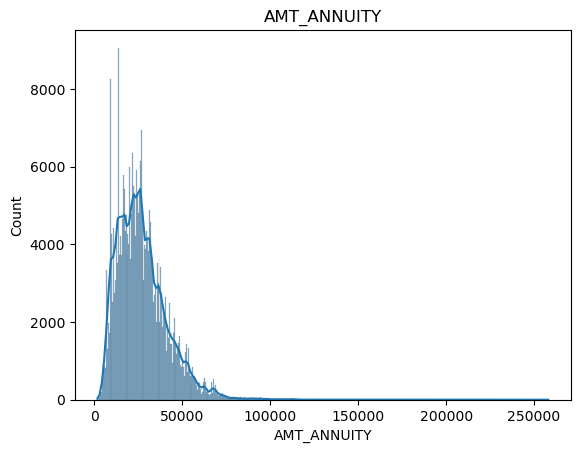

In [38]:
sns.histplot(df, x=df['AMT_ANNUITY'], kde=True)    # Plot a histogram
plt.title('AMT_ANNUITY')
plt.show()

In [39]:
# Considering the positive skewness of the data, we will replace the null values in 'amt_annuity' with the median.

In [8]:
df["AMT_ANNUITY"].fillna(df["AMT_ANNUITY"].median(),inplace=True)

## * AMT_GOODS_PRICE   - For consumer loans it is the price of the goods for which the loan is given

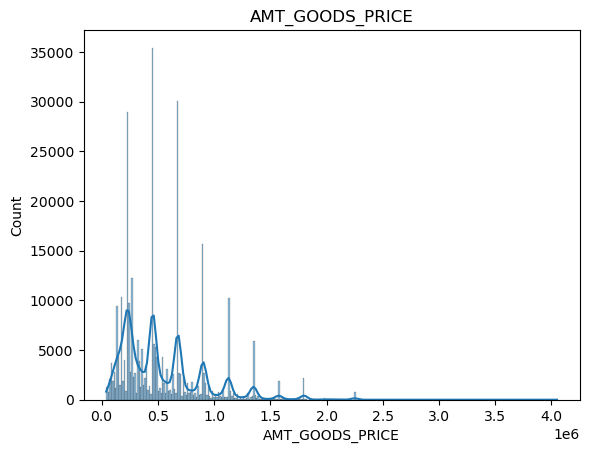

In [41]:
sns.histplot(df, x=df['AMT_GOODS_PRICE'], kde=True)
plt.title('AMT_GOODS_PRICE')
plt.show()

In [9]:
df["AMT_GOODS_PRICE"].fillna(df["AMT_GOODS_PRICE"].median(),inplace=True)

##  * EXT_SOURCE_2

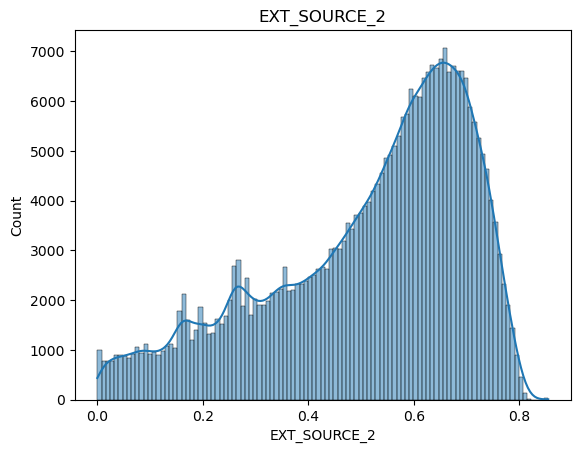

In [43]:
sns.histplot(df, x=df['EXT_SOURCE_2'], kde=True)
plt.title('EXT_SOURCE_2')
plt.show()

 ##### Filling null values with the median in the case of negatively skewed data is considered a prudent strategy. The median, being less sensitive to extreme values or outliers, helps ensure a robust imputation method that is less affected by the skewed distribution. 

In [44]:
df["EXT_SOURCE_2"].skew()

-0.7935760449636996

In [10]:
df["EXT_SOURCE_2"].fillna(df["EXT_SOURCE_2"].median(),inplace=True)

## * EXT_SOURCE_3

In [11]:
df["EXT_SOURCE_3"].fillna(df["EXT_SOURCE_3"].median(),inplace=True)


### * OBS_30_CNT_SOCIAL_CIRCLE-How many observation of client's social surroundings with observable 30 DPD(days past due)default
###  * DEF_30_CNT_SOCIAL_CIRCLE-How many observation of client's social surroundings defaulted on 30 DPD (days past due)
### * OBS_60_CNT_SOCIAL_CIRCLE-How many observation of client's social surroundings with observable 60 DPD (days past due) default
### * DEF_60_CNT_SOCIAL_CIRCLE-How many observation of client's social surroundings defaulted on 60 (days past due) DPD

Imputing missing counts with zeros is a logical choice, assuming that clients with missing values in these columns have no recorded observable or defaulted connections within the specified time frames. This approach aligns with the assumption of absence and maintains the integrity of the count-based data structure.

In [12]:
columns_to_impute = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

for column in columns_to_impute:
    df[column].fillna(0, inplace=True)

* AMT_REQ_CREDIT_BUREAU_HOUR - Number of enquiries to Credit Bureau about the client one hour before application

* AMT_REQ_CREDIT_BUREAU_DAY -Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)

* AMT_REQ_CREDIT_BUREAU_WEEK - Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)

* AMT_REQ_CREDIT_BUREAU_MON - Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)

* AMT_REQ_CREDIT_BUREAU_QRT- Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)

* AMT_REQ_CREDIT_BUREAU_YEAR - Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)

It's a common practice for lenders to perform credit inquiries, or credit checks, through credit bureaus when processing loan applications. To handle missing values in related columns, a sensible approach is to fill them with the median, assuming that the median provides a representative measure for the credit-related information gathered by the bureaus.

In [13]:
columns_to_fill = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

# Fill missing values in the specified columns with their respective medians
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())

# Categorical columns

## * NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan

In [14]:
df.dtypes['NAME_TYPE_SUITE']

dtype('O')

Contains categorical values. Replace them with the mode.

In [15]:
df["NAME_TYPE_SUITE"].isnull().sum()

1292

In [16]:
df["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [17]:
df["NAME_TYPE_SUITE"].mode()[0] # We are observing the most frequently occurring type.

'Unaccompanied'

In [18]:
df["NAME_TYPE_SUITE"].fillna(df["NAME_TYPE_SUITE"].mode()[0],inplace=True)

## * OCCUPATION_TYPE

In [19]:
df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [20]:
df.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

In [21]:
df["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [22]:
df["ORGANIZATION_TYPE"]=df["ORGANIZATION_TYPE"].replace("XNA","Pensioner")

In [23]:
df.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
Pensioner                 55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

In [24]:
df["OCCUPATION_TYPE"].isnull().sum()

96391

In [25]:
df["OCCUPATION_TYPE"].fillna("Pensioner",inplace=True)

## * CNT_FAM_MEMBERS

In [26]:
df["CNT_FAM_MEMBERS"].fillna(df["CNT_FAM_MEMBERS"].mode,inplace=True)

## * DAYS_LAST_PHONE_CHANGE

In [27]:
df["DAYS_LAST_PHONE_CHANGE"].fillna(df["DAYS_LAST_PHONE_CHANGE"].mode,inplace=True)

### we finally sort the null values 

In [30]:
pd.set_option('display.max_columns',None)
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

In [65]:
null_df=df.columns[df.isnull().sum() >0]
null_df  # Here are some categorical columns that need to have their null values handled.

Index([], dtype='object')

In [69]:
pd.set_option('display.max_columns',None)
df.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.0   
1                 1           1           0      Core staff             2.0   
2                 1           1           0        Laborers             1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.535276                       1.0   
2      0.555912      0.729567                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
0                       2.0                -1134.0                0   
1                       0.0                 -828.0                0   
2                       0.0                 -815.0      

DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE days values are in negative we will change these values to positive.

In [31]:
df[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       -9461           -637            -3648.0            -2120   
1      -16765          -1188            -1186.0             -291   
2      -19046           -225            -4260.0            -2531   
3      -19005          -3039            -9833.0            -2437   
4      -19932          -3038            -4311.0            -3458   

  DAYS_LAST_PHONE_CHANGE  
0                -1134.0  
1                 -828.0  
2                 -815.0  
3                 -617.0  
4                -1106.0

In [32]:
day_cols = [i for i in df if i.startswith('DAYS')]
day_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [33]:
df[day_cols] = df[day_cols].applymap(lambda x: x() if callable(x) else x)

In [34]:
df[day_cols]= abs(df[day_cols])


In [35]:
print(df['DAYS_BIRTH'].unique()) 
print(df['DAYS_EMPLOYED'].unique()) 
print(df['DAYS_REGISTRATION'].unique()) 
print(df['DAYS_ID_PUBLISH'].unique()) 
print(df['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]


TypeError: unhashable type: 'Series'

In [36]:
print(df['DAYS_LAST_PHONE_CHANGE'].dtype)

object


In [37]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].astype(int)

In [38]:
print(df['CNT_FAM_MEMBERS'].dtype)

object


In [41]:
df['CNT_FAM_MEMBERS'] = pd.to_numeric(df['CNT_FAM_MEMBERS'], errors='coerce')

In [142]:
df["CNT_FAM_MEMBERS"].isnull().sum()

2

In [141]:
df['CNT_FAM_MEMBERS'] = pd.to_numeric(df['CNT_FAM_MEMBERS'], errors='coerce')

In [45]:
# Converting DAYS_BIRTH to AGE
df["AGE"] = df.DAYS_BIRTH.apply(lambda x :round(abs(x)/365),0)
df["AGE"]
df["AGE"] = pd.to_numeric(df["AGE"])

In [46]:
# Dropping "DAYS_BIRTH" column, since we have converted the DAYS to AGE
df.drop("DAYS_BIRTH",axis=1,inplace=True)

In [47]:
df["AGE"].head(3)

0    26
1    46
2    52
Name: AGE, dtype: int64

# Outliers Handling


In [ ]:
# Checking Outliers for Numeric Columns

In [ ]:
'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2'

# AMT_INCOME_TOTAL

<Axes: xlabel='AMT_INCOME_TOTAL'>

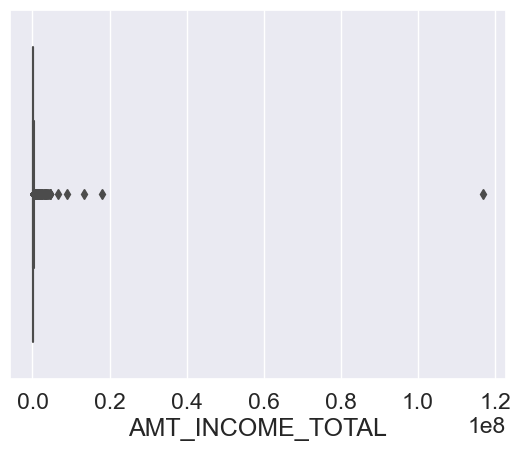

In [82]:
sns.boxplot(x=df.AMT_INCOME_TOTAL)

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

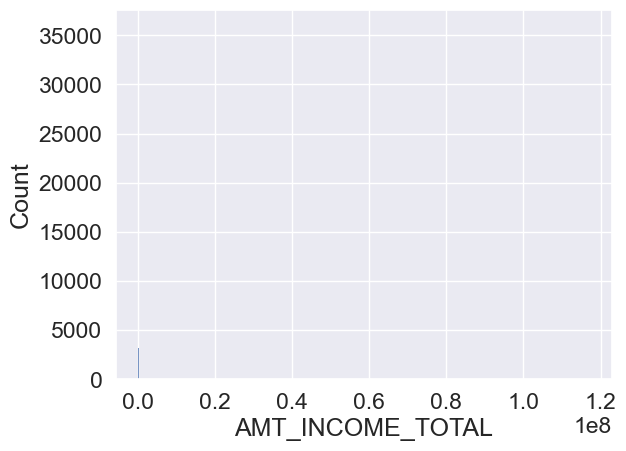

In [83]:
sns.histplot(x=df.AMT_INCOME_TOTAL)

In [48]:
# How to find outliers in AMT_INCOME_TOTAL
Q1=df['AMT_INCOME_TOTAL'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['AMT_INCOME_TOTAL'].quantile(0.75)
print('upper quartile',Q3)
# Find IQR
IQR=Q3-Q1
IQR
# How to find the Outliers in AMT_INCOME_TOTAL
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower quartile 112500.0
upper quartile 202500.0
lower limit is -22500.0
upper limit is 337500.0


In [49]:
# find percentage of outliers 
len(df.loc[df['AMT_INCOME_TOTAL']>upper_limit])/len(df)

0.045640643749329295

In [50]:
len(df.loc[df['AMT_INCOME_TOTAL']>upper_limit])/len(df)*100

4.564064374932929

### Since data is not normal and percentage of outliers is less than 5%,it will replace these outliers with median.

In [51]:
df.loc[df['AMT_INCOME_TOTAL']>upper_limit,'AMT_INCOME_TOTAL']=df['AMT_INCOME_TOTAL'].median()

In [52]:
# Find the values below lower limit 
df.loc[df['AMT_INCOME_TOTAL']<lower_limit]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, AGE]
Index: []

In [53]:
# outliers handled

<Axes: xlabel='AMT_INCOME_TOTAL'>

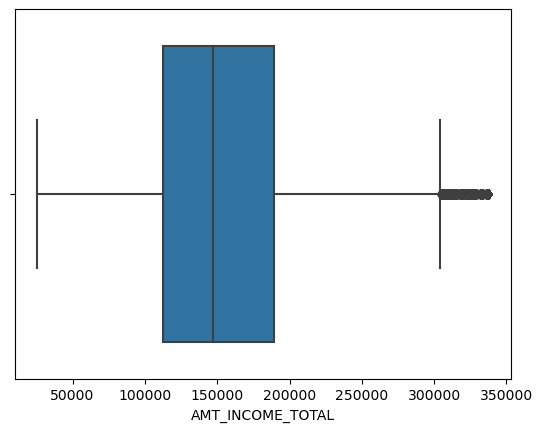

In [54]:
sns.boxplot(x=df.AMT_INCOME_TOTAL)

# AMT_CREDIT

<Axes: xlabel='AMT_CREDIT'>

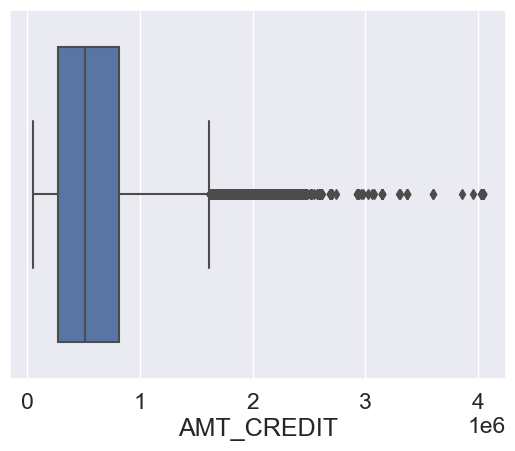

In [84]:
sns.boxplot(x=df.AMT_CREDIT)

<Axes: xlabel='AMT_CREDIT', ylabel='Count'>

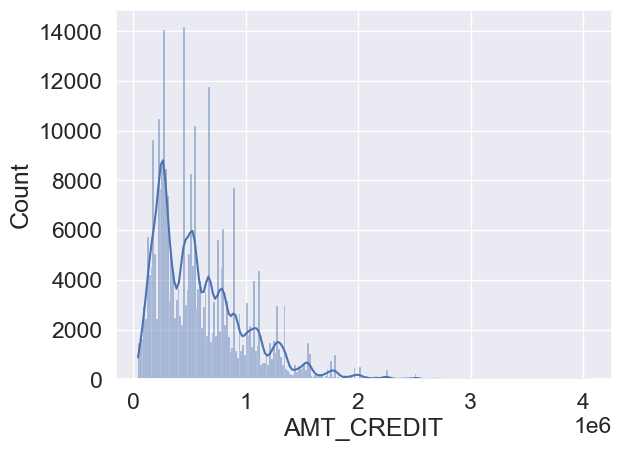

In [86]:
sns.histplot(x=df.AMT_CREDIT,kde=True)

In [108]:
# How to find outliers in AMT_CREDIT
Q1=df['AMT_CREDIT'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['AMT_CREDIT'].quantile(0.75)
print('upper quartile',Q3)
# Find IQR
IQR=Q3-Q1
IQR
# How to find the Outliers in AMT_CREDIT
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower quartile 270000.0
upper quartile 808650.0
lower limit is -537975.0
upper limit is 1616625.0


In [109]:
# find percentage of outliers 
len(df.loc[df['AMT_CREDIT']>upper_limit])/len(df)

0.0213390740493836

In [110]:
len(df.loc[df['AMT_CREDIT']>upper_limit])/len(df)*100

2.13390740493836

### Since data is not normal and percentage of outliers is less than 5%,it will replace these outliers with median.

In [55]:
df.loc[df['AMT_CREDIT']>upper_limit,'AMT_CREDIT']=df['AMT_CREDIT'].median()

In [112]:
# Find the values below lower limit 
df.loc[df['AMT_CREDIT']<lower_limit]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

<Axes: xlabel='AMT_CREDIT'>

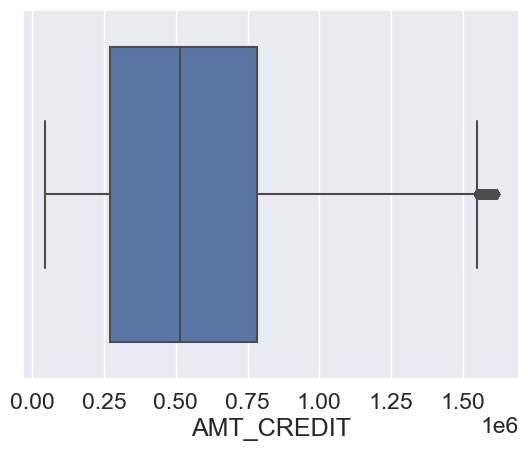

In [113]:
sns.boxplot(x=df.AMT_CREDIT)

# AMT_ANNUITY

<Axes: xlabel='AMT_ANNUITY'>

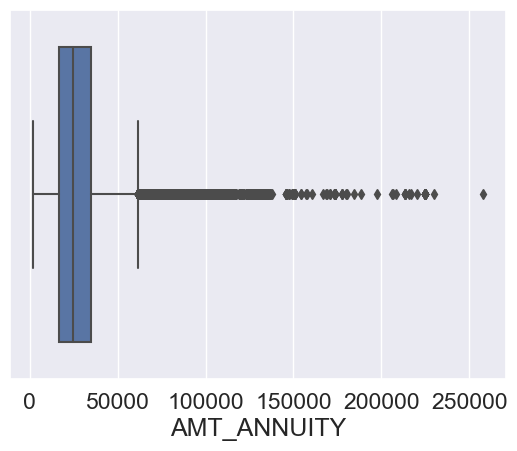

In [87]:
sns.boxplot(x=df.AMT_ANNUITY)

<Axes: xlabel='AMT_ANNUITY', ylabel='Count'>

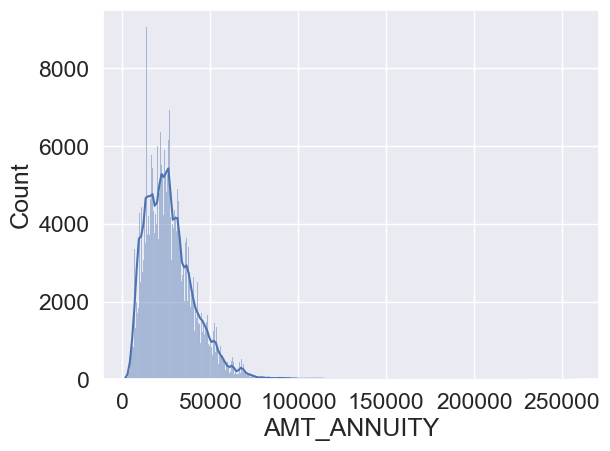

In [89]:
sns.histplot(x=df.AMT_ANNUITY,kde=True)

In [117]:
# How to find outliers in AMT_ANNUITY
Q1=df['AMT_ANNUITY'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['AMT_ANNUITY'].quantile(0.75)
print('upper quartile',Q3)
# Find IQR
IQR=Q3-Q1
IQR
# How to find the Outliers in AMT_ANNUITY
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower quartile 16524.0
upper quartile 34596.0
lower limit is -10584.0
upper limit is 61704.0


In [118]:
# find percentage of outliers 
len(df.loc[df['AMT_ANNUITY']>upper_limit])/len(df)

0.024402379101885786

In [119]:
len(df.loc[df['AMT_ANNUITY']>upper_limit])/len(df)*100

2.4402379101885785

In [ ]:
### Since data is not normal and percentage of outliers is less than 5%,it will replace these outliers with median.

In [56]:
df.loc[df['AMT_ANNUITY']>upper_limit,'AMT_ANNUITY']=df['AMT_ANNUITY'].median()

In [121]:
# Find the values below lower limit 
df.loc[df['AMT_ANNUITY']<lower_limit]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

# AMT_GOODS_PRICE

<Axes: xlabel='AMT_GOODS_PRICE'>

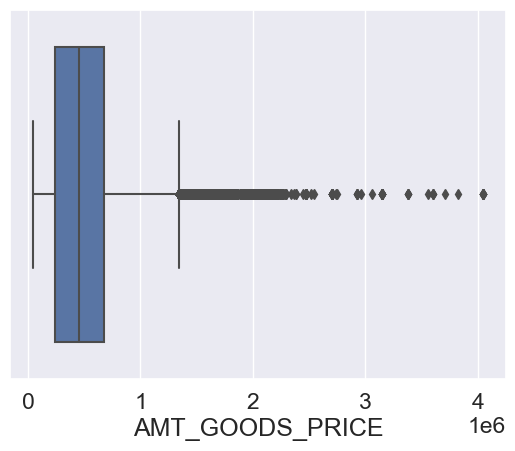

In [90]:
sns.boxplot(x=df.AMT_GOODS_PRICE)

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Count'>

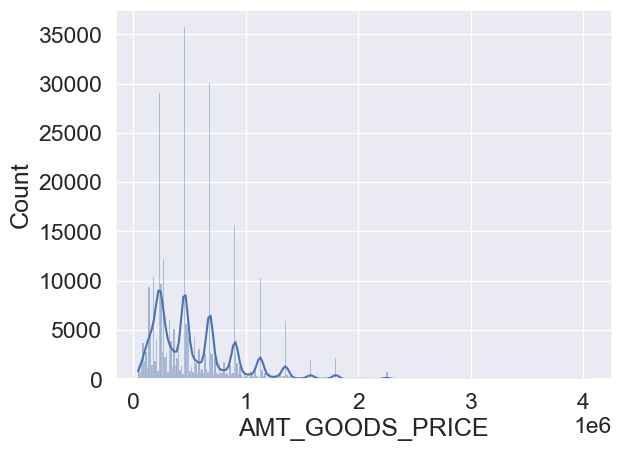

In [91]:
sns.histplot(x=df.AMT_GOODS_PRICE,kde=True)

In [122]:
# How to find outliers in AMT_GOODS_PRICE
Q1=df['AMT_GOODS_PRICE'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['AMT_GOODS_PRICE'].quantile(0.75)
print('upper quartile',Q3)
# Find IQR
IQR=Q3-Q1
IQR
# How to find the Outliers in AMT_GOODS_PRICE
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower quartile 238500.0
upper quartile 679500.0
lower limit is -423000.0
upper limit is 1341000.0


In [123]:
# find percentage of outliers 
len(df.loc[df['AMT_GOODS_PRICE']>upper_limit])/len(df)

0.04789422167011912

In [124]:
len(df.loc[df['AMT_GOODS_PRICE']>upper_limit])/len(df)*100

4.789422167011912

### Since data is not normal and percentage of outliers is less than 5%,it will replace these outliers with median.

In [57]:
df.loc[df['AMT_GOODS_PRICE']>upper_limit,'AMT_GOODS_PRICE']=df['AMT_GOODS_PRICE'].median()

In [59]:
# Find the values below lower limit 
df.loc[df['AMT_GOODS_PRICE']<lower_limit]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, AGE]
Index: []

# DAYS_REGISTRATION

<Axes: xlabel='DAYS_REGISTRATION'>

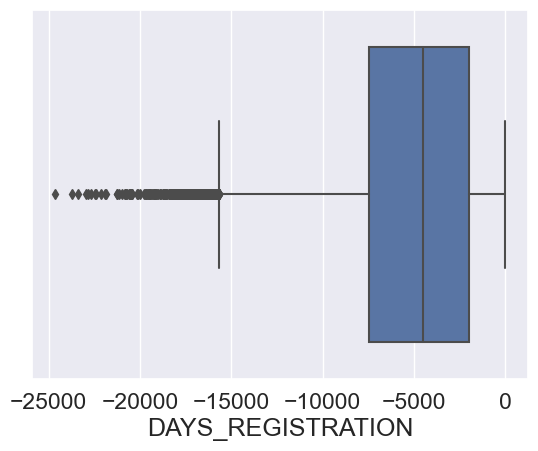

In [94]:
sns.boxplot(x=df.DAYS_REGISTRATION)

In [55]:
# How to find outliers in DAYS_REGISTRATION
Q1=df['DAYS_REGISTRATION'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['DAYS_REGISTRATION'].quantile(0.75)
print('upper quartile',Q3)
# Find IQR
IQR=Q3-Q1
IQR
# How to find the Outliers in DAYS_REGISTRATION
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower quartile 2010.0
upper quartile 7479.5
lower limit is -6194.25
upper limit is 15683.75


In [56]:
# find percentage of outliers 
len(df.loc[df['DAYS_REGISTRATION']>upper_limit])/len(df)

0.0021430127702748844

In [57]:
len(df.loc[df['DAYS_REGISTRATION']>upper_limit])/len(df)*100

0.21430127702748844

In [ ]:
### Since data is not normal and percentage of outliers is less than 5%,it will replace these outliers with median.

In [58]:
df.loc[df['DAYS_REGISTRATION']>upper_limit,'DAYS_REGISTRATION']=df['DAYS_REGISTRATION'].median()

In [60]:
# Find the values below lower limit 
df.loc[df['DAYS_REGISTRATION']<lower_limit]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, AGE]
Index: []

# EXT_SOURCE_2

<Axes: xlabel='EXT_SOURCE_2'>

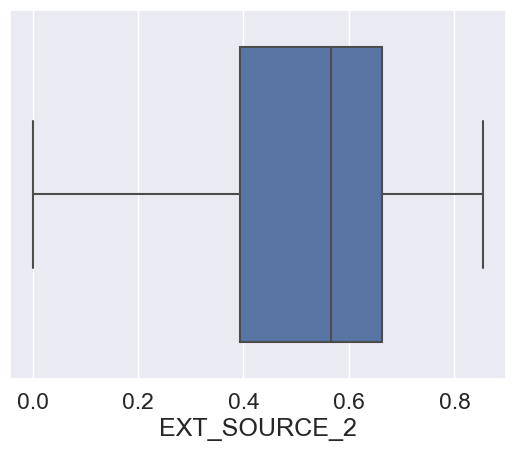

In [96]:
sns.boxplot(x=df.EXT_SOURCE_2)

# EDA - Exploratory data analysis

In [ ]:
# Univariate Analysis

## categorical columns

In [61]:
def plot_categorical_distributions_side_by_side(df, column1, column2=None):
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot the first countplot
    sns.countplot(data=df, x=column1, palette='Set1', ax=axes[0])
    axes[0].set_title(f'Distribution of {column1}')
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel('Count')
    axes[0].set_yscale("log")
    axes[0].tick_params(rotation=45)
    
    
    # Plot the second countplot if a second column is provided
    if column2:
        sns.countplot(data=df, x=column2, hue="TARGET", palette='Set1', ax=axes[1])
        axes[1].set_title(f'Distribution of {column2}')
        axes[1].set_xlabel(column2)
        axes[1].set_ylabel('Count')
        axes[1].set_yscale("log")
        axes[1].tick_params(rotation=45)
    
    # Adjust the layout to prevent overlapping
    plt.tight_layout()

    # Show the plots
    plt.show()

#  AMT_INCOME_TOTAL

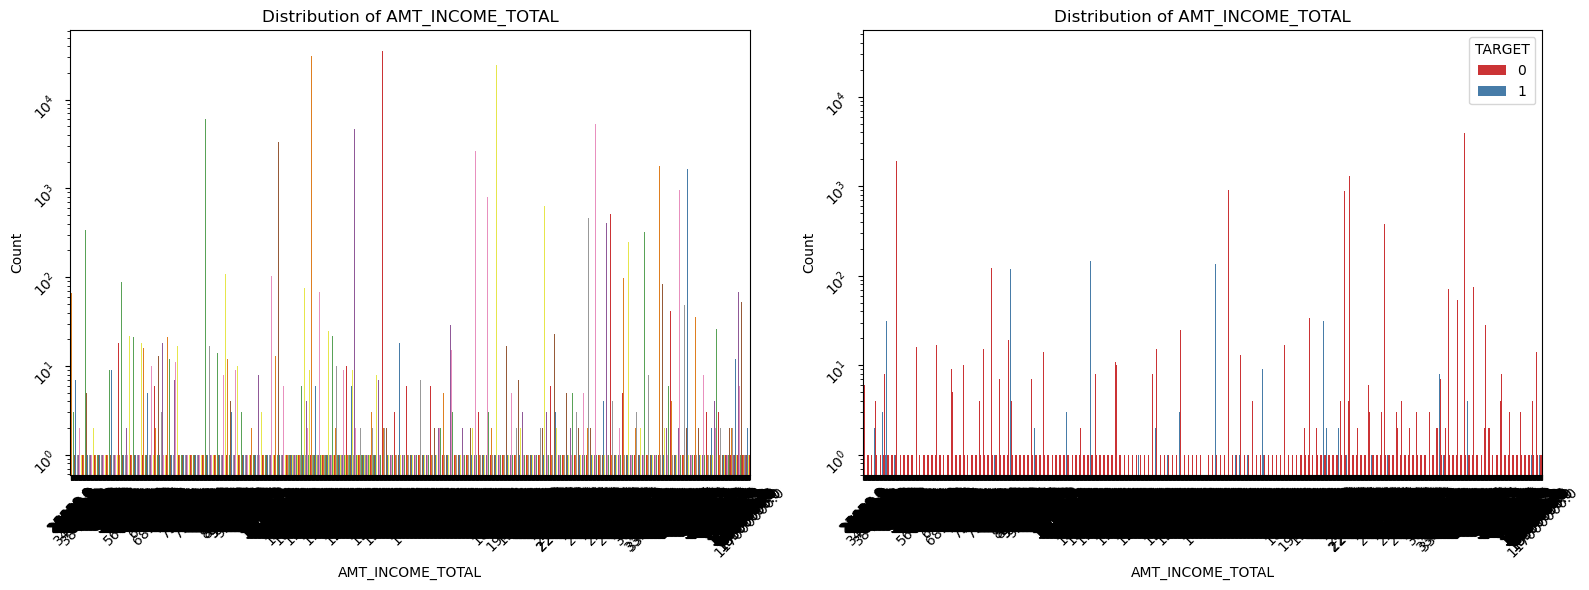

In [62]:
plot_categorical_distributions_side_by_side(df, 'AMT_INCOME_TOTAL',"AMT_INCOME_TOTAL")

###  Due to the large number of values in our DataFrame, it's challenging to visualize or interpret the distribution correctly.

In [63]:
df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [59]:
income_bins = [25650, 75000, 112500, 135000, 157500, 180000, 202500, 225000, 117000000]
income_labels = ["26k to 75k", "75k to 112.5k", "112.5k to 135k", "135k to 157.5k", "157.5k to 180k", "180k to 202.5k", "202.5k to 225k", "225k to 117M"]

In [60]:
# Creating a new column INCOME_GROUP
df['INCOME_GROUP'] = pd.cut(df['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels)

In [61]:
df.INCOME_GROUP.value_counts()

75k to 112.5k     76686
112.5k to 135k    48849
135k to 157.5k    47663
225k to 117M      33083
157.5k to 180k    32529
202.5k to 225k    24420
26k to 75k        23890
180k to 202.5k    20389
Name: INCOME_GROUP, dtype: int64

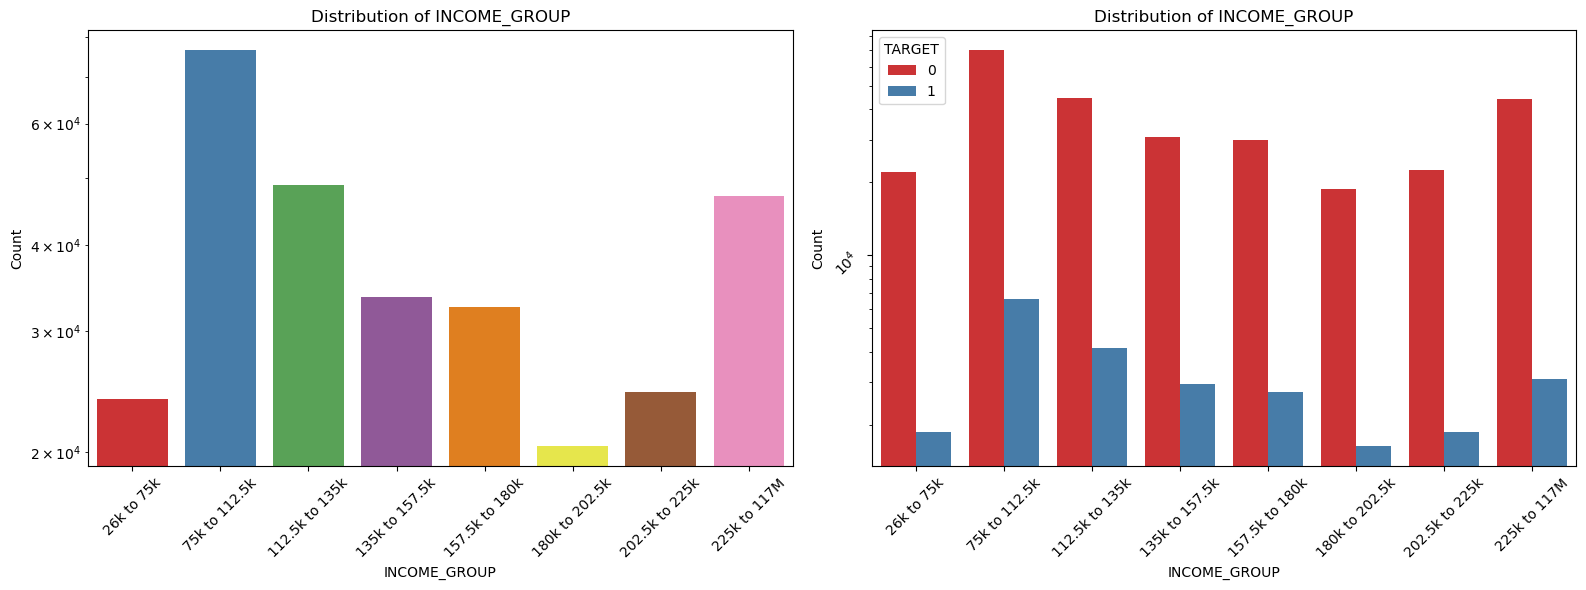

In [67]:
plot_categorical_distributions_side_by_side(df, 'INCOME_GROUP',"INCOME_GROUP")

It appears that a majority of people in our dataset have incomes between 75k and 112k and the highest number of defaulters also fall within this income range. This observation suggests a potential correlation between income levels and loan default rates.

# NAME_EDUCATION_TYPE

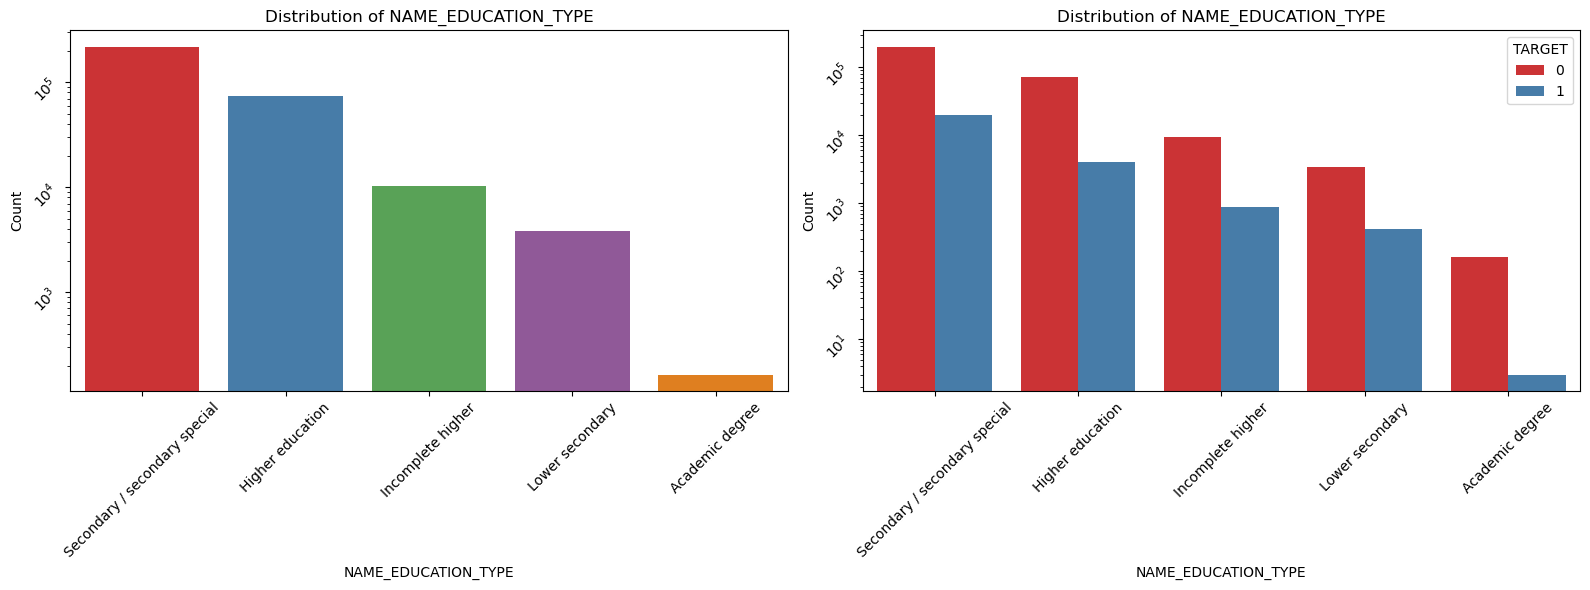

In [68]:
plot_categorical_distributions_side_by_side(df, 'NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE')

# Insights

* The dataset primarily consists of individuals who have completed Secondary or secondary special education, indicating that a significant proportion of clients have attained a basic level of education. This suggests a potential focus on a diverse demographic, possibly including individuals from various socioeconomic backgrounds.

* Interestingly, the second most prevalent education level among clients is Higher education.

* Academic degree holders make up a relatively small portion of the dataset. This implies that individuals with the highest level of education (academic degrees) are not as prevalent in the dataset compared to those with lower levels of education.


Default Rates by Education Type:

* Among the analyzed education groups, clients with Lower secondary education exhibit the highest default rate. This suggests that individuals with Lower secondary education might face a higher risk of defaulting on loans compared to other education categories.

* In contrast, clients with Academic degrees have the lowest default rates. This finding indicates that individuals with higher levels of education, specifically those holding Academic degrees, are less likely to experience issues with loan defaulting.

* It's noteworthy that individuals with Academic degrees stand out as the group least likely to face problems with loan defaulting. This observation may have implications for lenders, policymakers, or researchers interested in understanding and mitigating default risks in the lending process

# FLAG_OWN_REALTY - If the client owns a house or not

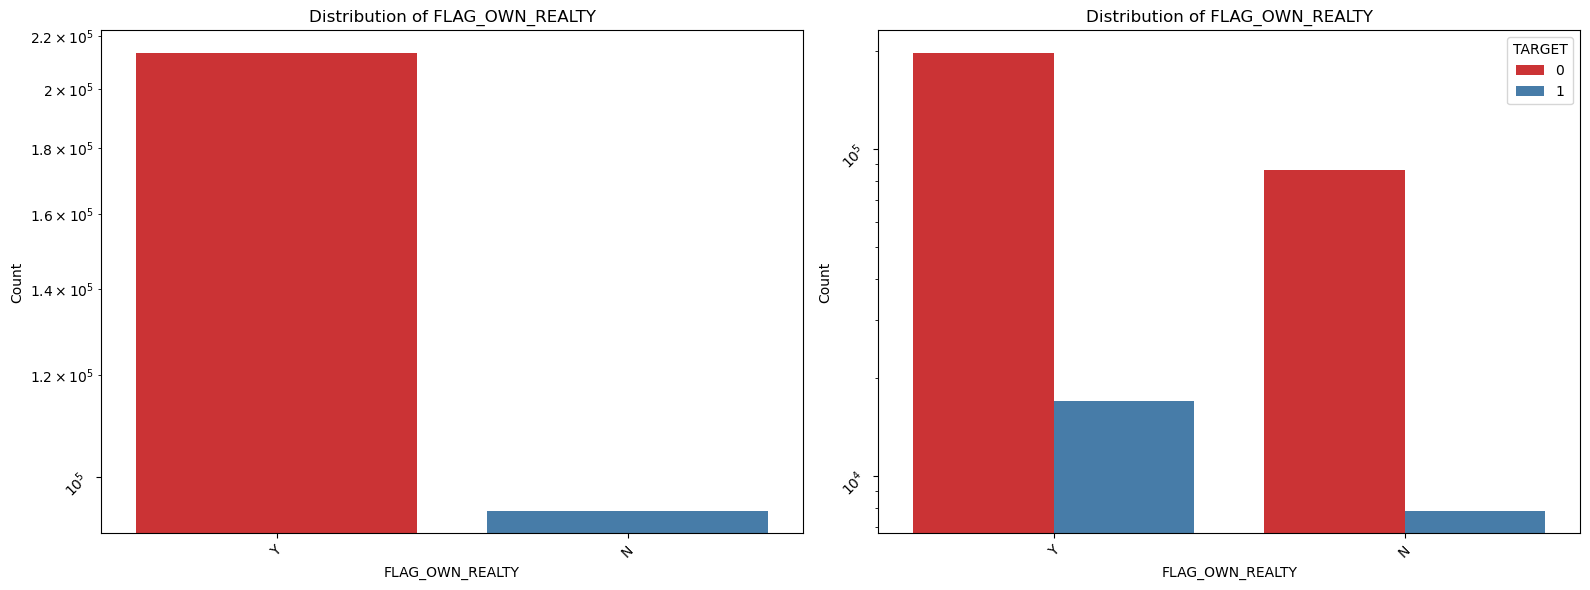

In [69]:
plot_categorical_distributions_side_by_side(df, 'FLAG_OWN_REALTY',"FLAG_OWN_REALTY")

# Insights

* The majority of clients in the dataset own a house. This suggests that a significant portion of the client base possesses real estate assets in the form of houses.

* Clients who own houses are more than double in number compared to those who don't own. This indicates a notable imbalance in the distribution of clients based on ownership of houses.

Based on the data, there doesn't appear to be a significant correlation between owning real estate and loan defaulting. This implies that, at a high level, owning real estate may not be a strong predictor of loan default in the dataset.

# CODE_GENDER

In [62]:
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [63]:
df.CODE_GENDER.replace("XNA","F",inplace=True)
df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

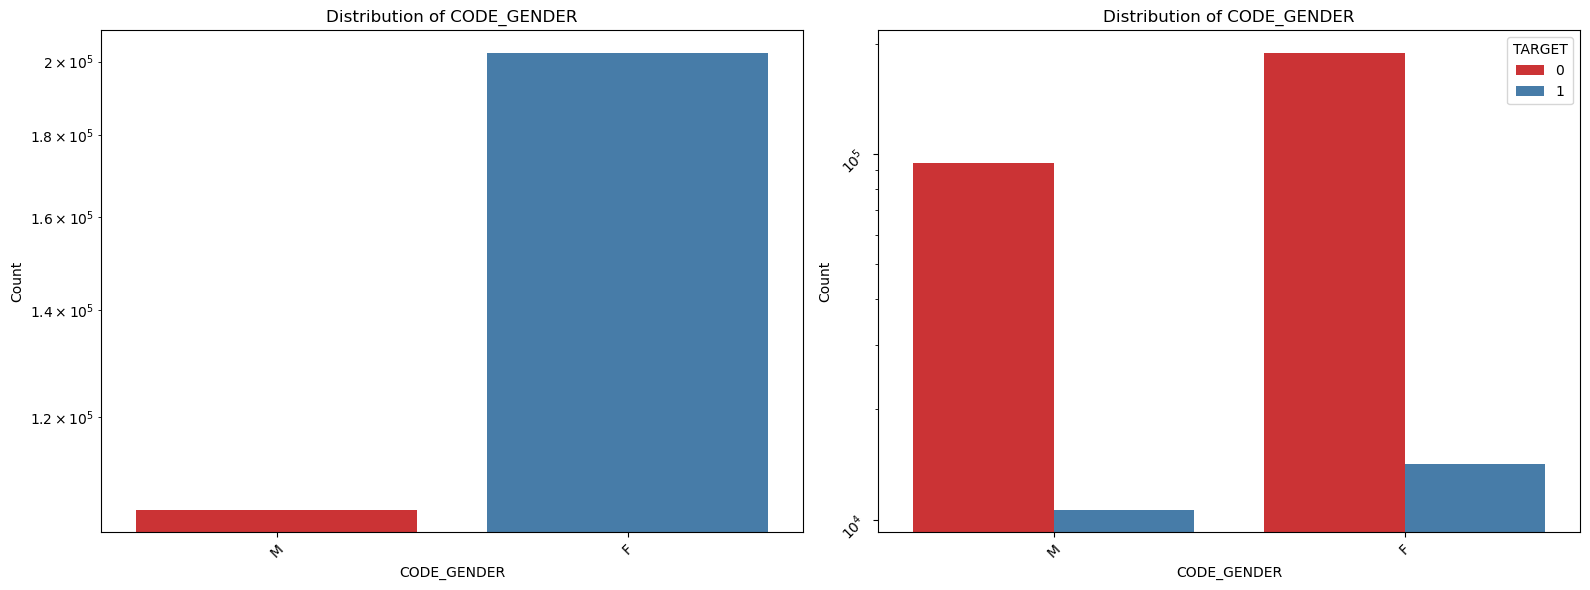

In [73]:
plot_categorical_distributions_side_by_side(df, 'CODE_GENDER',"CODE_GENDER")

# Insights 

our observation regarding the gender distribution in the dataset, with almost double the number of female clients compared to male clients, provides an interesting insight into the composition of loan applicants.

* The dataset comprises almost double the number of female clients compared to male clients.
* This suggests that there are more female applicants seeking loans.

Loan Default Rates:

* Male clients demonstrate a higher likelihood of not repaying their loans, evidenced by a higher default rate.
* In contrast, female clients exhibit a comparatively lower default rate.
* These findings imply that gender might play a role in loan default tendencies, with a nuanced difference observed between males and females.
* Specifically, males appear to carry a slightly higher risk of not returning their loans compared to their female counterparts.

# REGION_RATING_CLIENT

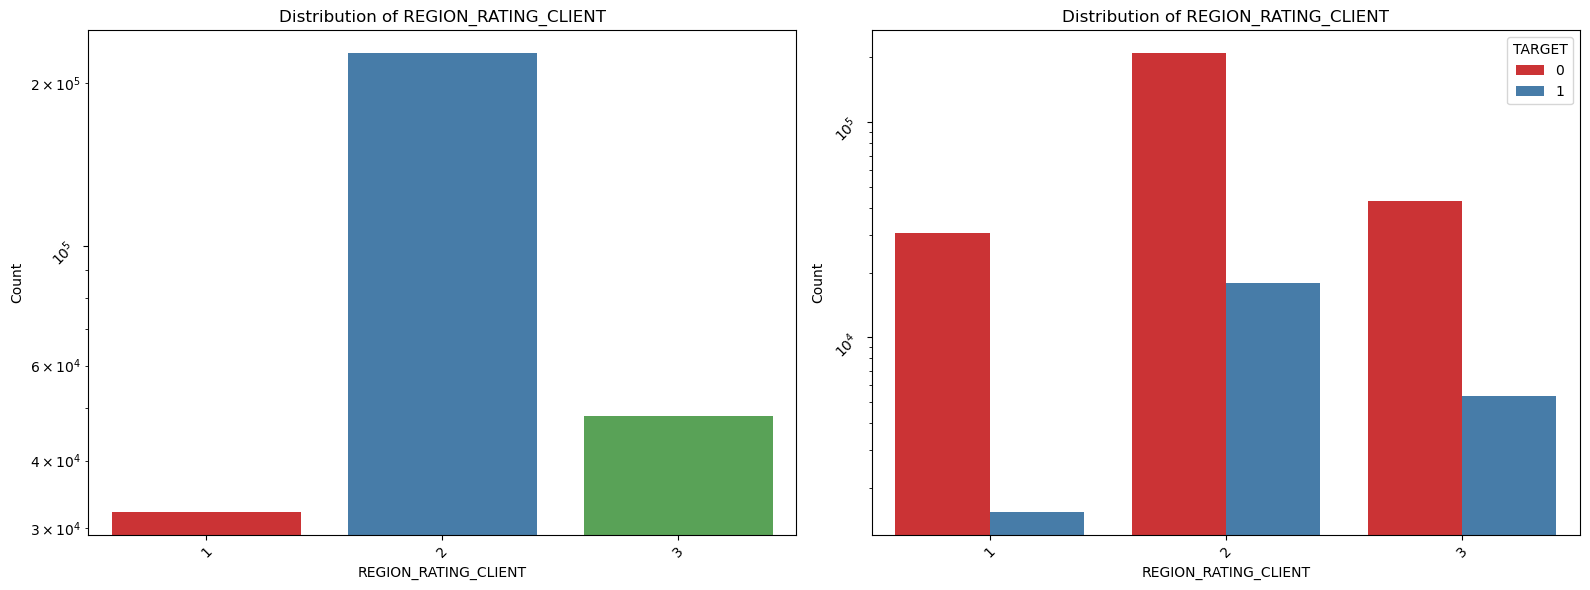

In [74]:
plot_categorical_distributions_side_by_side(df, 'REGION_RATING_CLIENT',"REGION_RATING_CLIENT")

# Insights

* The majority of loan applicants are concentrated in Region Rating 2, suggesting a significant portion of the client base resides in this region.

* Region Rating 1 is linked to the lowest default rate among applicants. This indicates that applicants from Region Rating 1 demonstrate a lower likelihood of defaulting on loans compared to other regions.

* Considering the lower default rate associated with Region Rating 1, approving loans for clients in this region appears to be a safer choice.

# AGE

<Figure size 4000x4500 with 0 Axes>

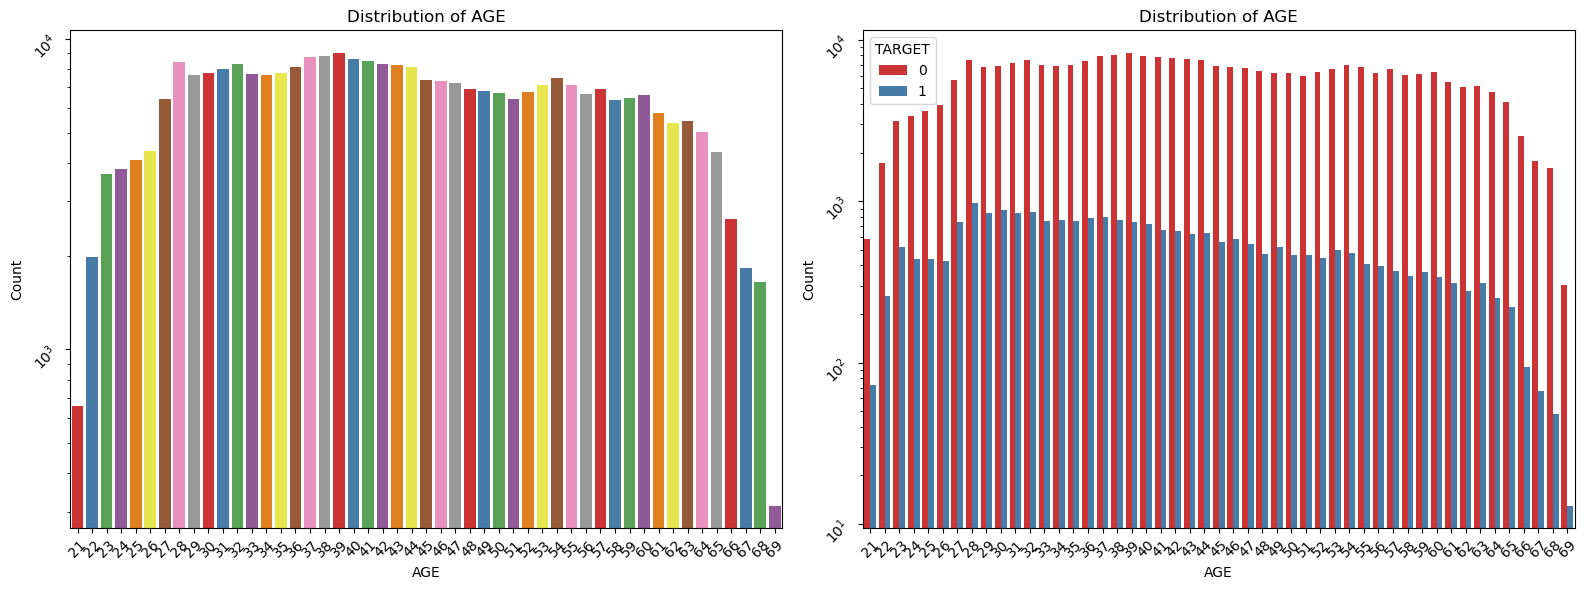

In [77]:
plt.figure(figsize=(40,45))
plot_categorical_distributions_side_by_side(df, 'AGE',"AGE")

## Here we can't get the proper insights so we can divide the age into groups

In [64]:
# Create bins and labels for age groups
age_bins = [0, 18, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-18', '18-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

In [65]:
# Create a new column 'AGE_GROUP' based on the bins and labels 
df['AGE_GROUP'] = pd.cut(df.AGE, bins=age_bins, labels=age_labels)


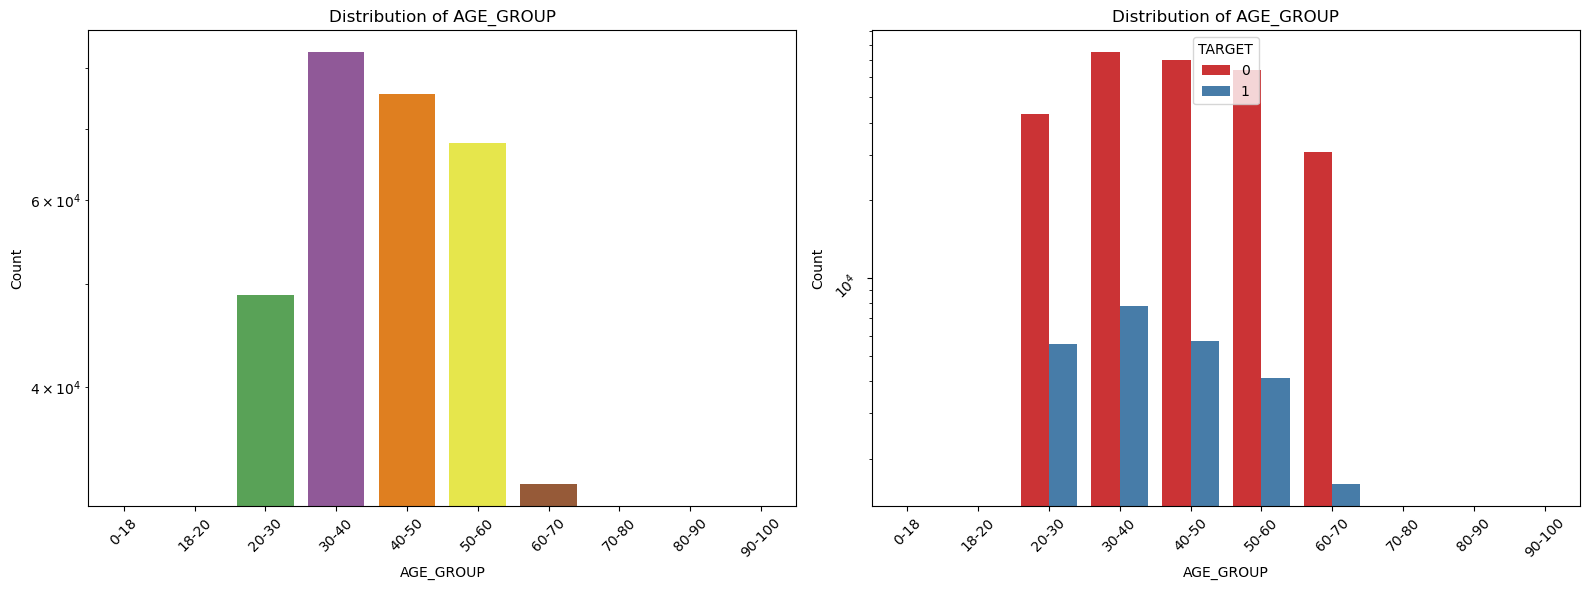

In [81]:
plot_categorical_distributions_side_by_side(df, 'AGE_GROUP',"AGE_GROUP")

# Insights

* The majority of loan applicants fall within the age range of 30–40, indicating a concentration of individuals in this demographic.

* Notably, individuals with higher ages exhibit lower default rates. This implies that, on average, applicants in older age groups are less likely to default on loans compared to their younger counterparts.

# DAYS_EMPLOYED

In [66]:
df['EMPLOYMENT_BINS'] = pd.cut(df['DAYS_EMPLOYED'], 
                               bins=[1, 2, 5, 9, 13, 19, 25, 32, 50],  
                               labels=['1-2 years', '2-5 years', '5-9 years', '9-13 years', '13-19 years', '19-25 years', '25-32 years', '32+ years'],  # Assign labels to bins
                               include_lowest=True)

In [67]:
df.EMPLOYMENT_BINS.value_counts()

32+ years      115
25-32 years     32
13-19 years     27
19-25 years     14
9-13 years      12
2-5 years        8
5-9 years        8
1-2 years        3
Name: EMPLOYMENT_BINS, dtype: int64

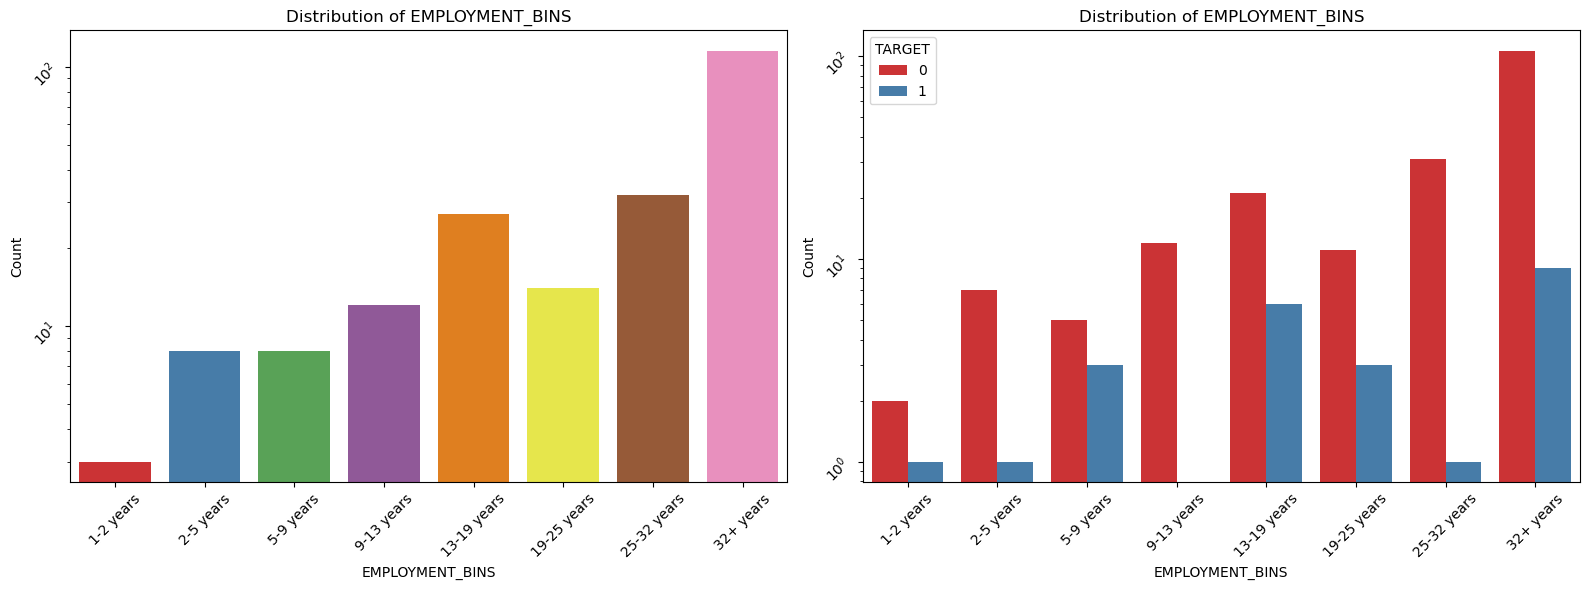

In [84]:
plot_categorical_distributions_side_by_side(df, 'EMPLOYMENT_BINS',"EMPLOYMENT_BINS")

# Insights

Prevalence of Work Experience Between 1 to 5 Years:

* The majority of loan applicants possess work experience falling within the range of 1 to 5 years. This suggests that a significant portion of the client base has relatively early to mid-level career experience.

Highest Default Rate Among Those with 1–5 Years of Experience:

* Applicants with work experience between 1 and 5 years exhibit the highest default rate. This implies a correlation between this specific range of work experience and a higher likelihood of loan default.

Lowest Default Rate Among Those with 25+ Years of Experience:

* Conversely, individuals with work experience exceeding 25 years demonstrate the lowest default rates. This indicates that applicants with extensive work experience are associated with a lower risk of defaulting on loans.

# CNT_CHILDREN

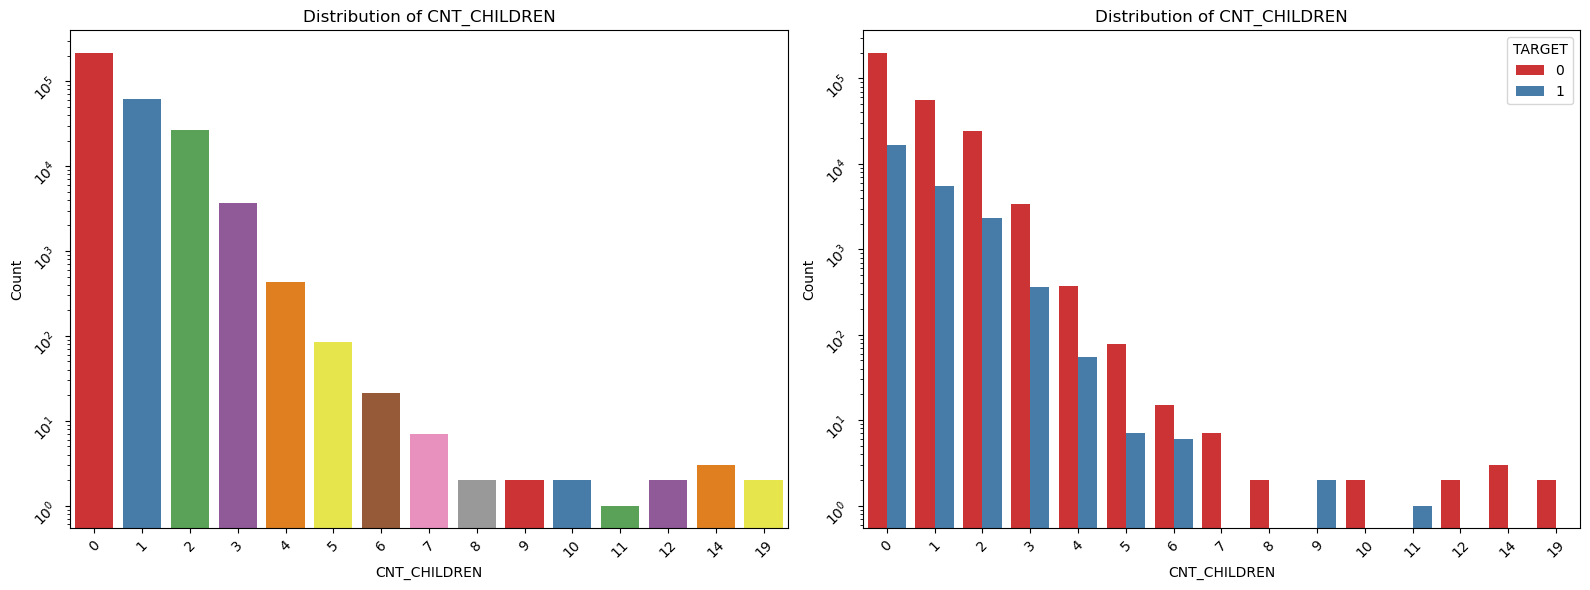

In [85]:
plot_categorical_distributions_side_by_side(df, 'CNT_CHILDREN',"CNT_CHILDREN")


# Insights

Dominance of Applicants with 0 Children:

* The majority of loan applicants fall into the category of having 0 children. This indicates that a significant portion of the client base consists of individuals or households without children.

Highest Default Rate Among Those with More Than 7 Children:

* Applicants with more than 7 children exhibit the highest default rates. This suggests that individuals or households with a larger number of children are associated with a higher likelihood of defaulting on loans.

# OCCUPATION_TYPE

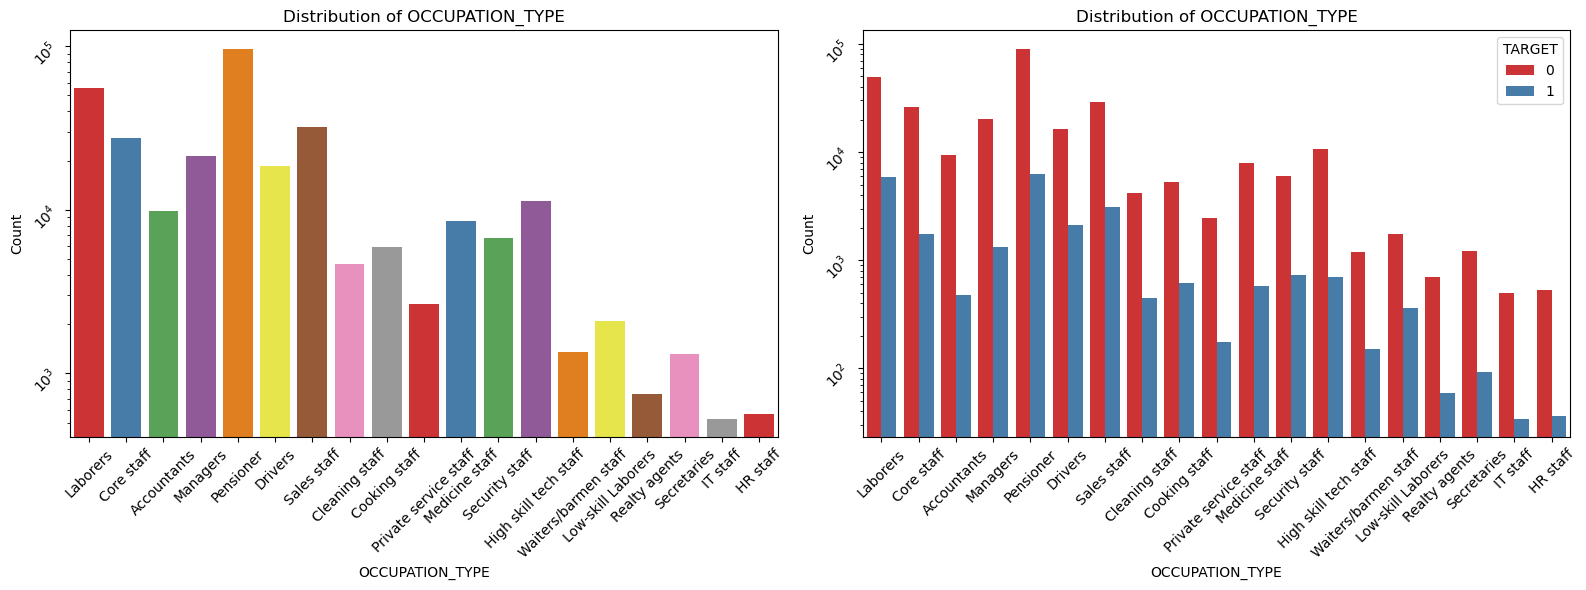

In [86]:
plot_categorical_distributions_side_by_side(df, 'OCCUPATION_TYPE',"OCCUPATION_TYPE")

# Insights

Dominant Occupations Among Loan Applicants:

* The majority of loan applicants are categorized as "Laborers" and "Pensioners," with "Sales Staff" closely following.
* Conversely, "IT Staff" represents the smallest group of loan applicants.

Highest Default Rates by Occupation:

* "Low-Skill Laborers" stand out as the occupation category with the highest default rate. This suggests a higher likelihood of loan default among individuals in this occupation.
* Following closely are other occupation categories, including "Drivers," "Waiters/Barmen Staff," "Security Staff," "Laborers," and "Cooking Staff," all exhibiting elevated default rates.

# NAME_FAMILY_STATUS

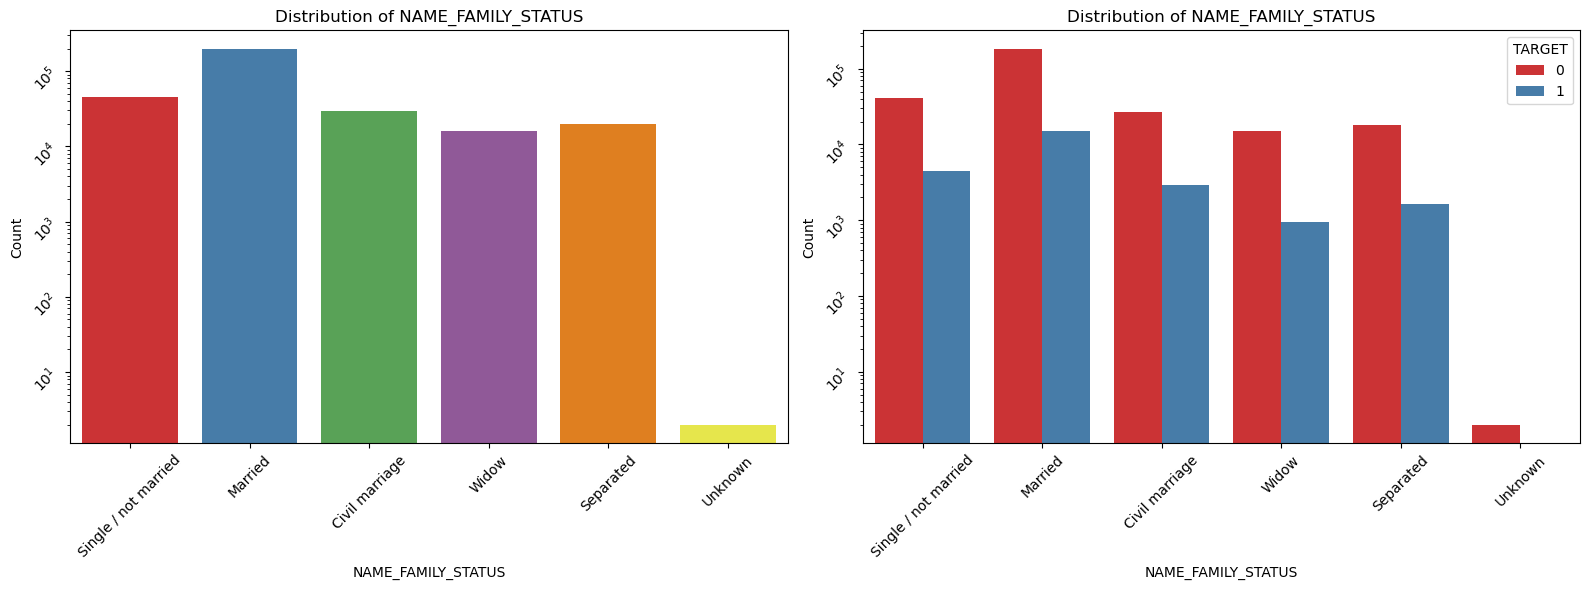

In [87]:
plot_categorical_distributions_side_by_side(df, 'NAME_FAMILY_STATUS',"NAME_FAMILY_STATUS")


# Insights

Higher Loan Uptake Among Married Individuals:

* A significant proportion of loan applicants are married individuals, indicating that this marital status category has a higher representation among loan seekers.

Highest Default Rate for Civil Marriage:

* Within the married category, those with a civil marriage exhibit the highest default rate. This suggests that individuals who have undergone a civil marriage may face a higher likelihood of defaulting on loans compared to other married individuals.

# NAME_HOUSING_TYPE

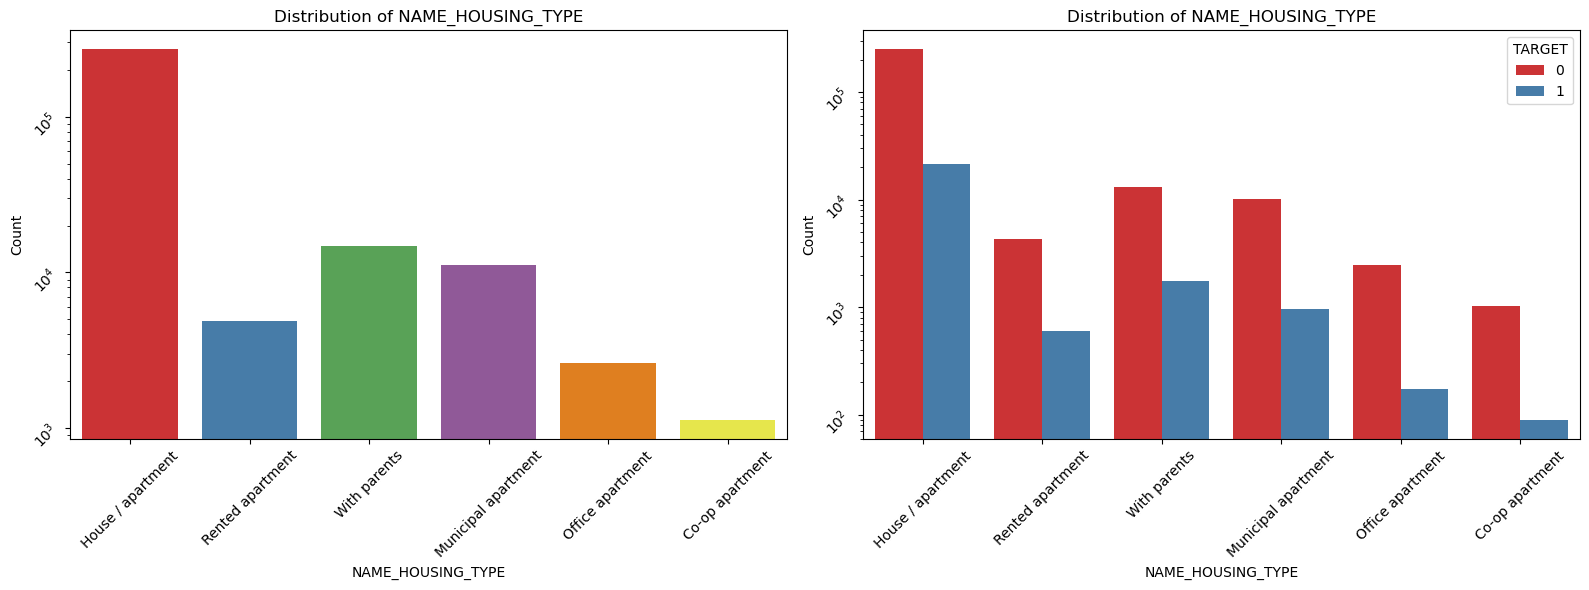

In [88]:
plot_categorical_distributions_side_by_side(df, 'NAME_HOUSING_TYPE',"NAME_HOUSING_TYPE")

Prevalence of House/Apartment Dwellers:

* The majority of loan applicants reside in houses/apartments, indicating a high representation of this housing type within the dataset.

Loan Volume and High Default Rates in House/Apartment Dwellers:

* House/apartment dwellers not only constitute a significant portion of loan applicants but also have the highest default rates. This suggests that individuals living in houses/apartments have taken a substantial number of loans, but they also face a higher risk of default compared to other housing types.

Lowest Default Rates in Co-op Apartment Residents:

* In contrast, individuals living in co-op apartments exhibit the lowest default rates. This implies that this housing type is associated with a lower likelihood of defaulting on loans.

# NAME_CONTRACT_TYPE

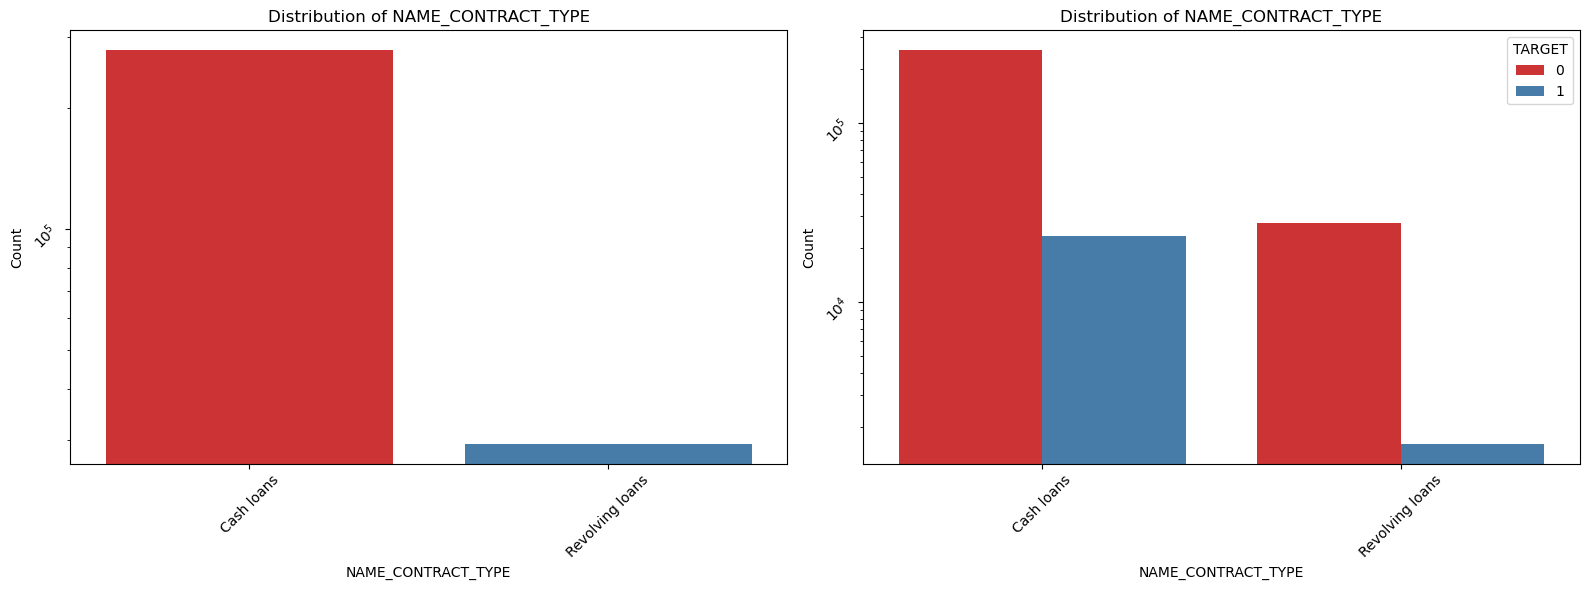

In [90]:
plot_categorical_distributions_side_by_side(df, 'NAME_CONTRACT_TYPE',"NAME_CONTRACT_TYPE")

# Insights

* The observation holds true for both defaulters and non-defaulters, indicating a consistent trend across the client population.
* A very small proportion of clients, both defaulters and non-defaulters, have applied for revolving loans. This suggests that revolving loans are less popular among the client base.

# FLAG_OWN_CAR

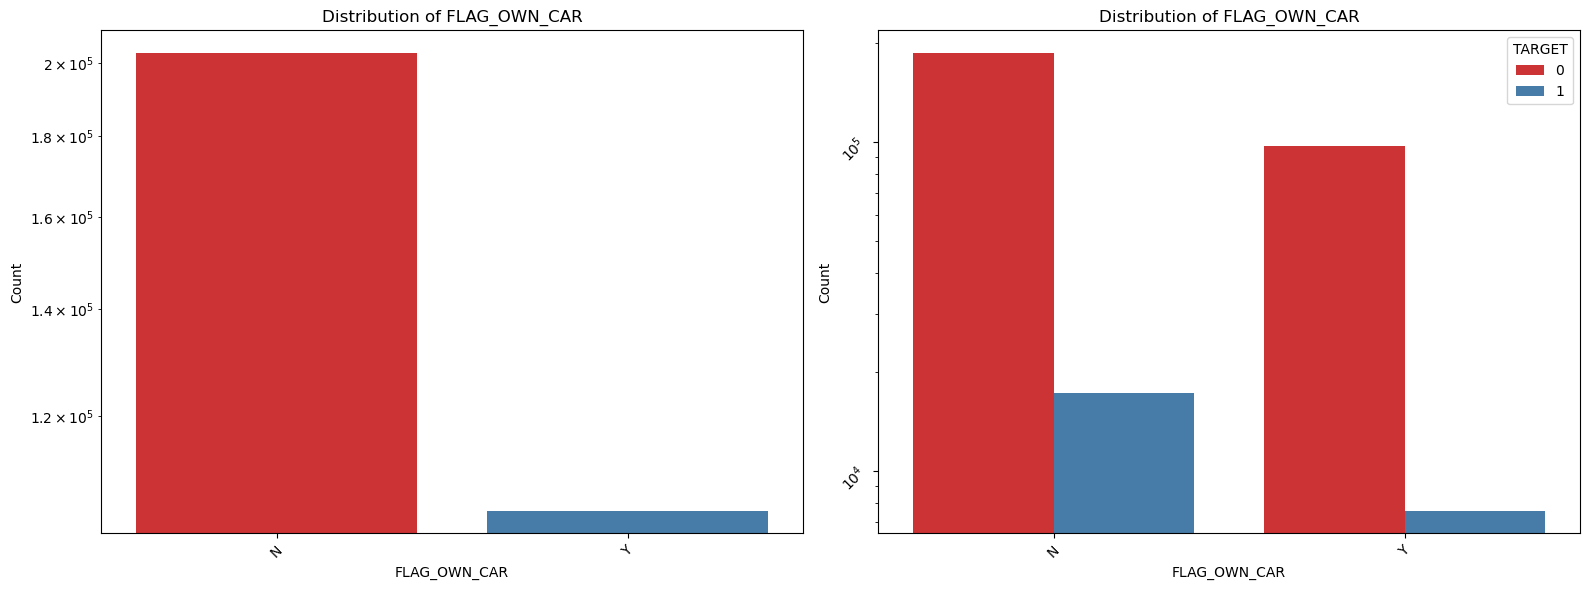

In [91]:
plot_categorical_distributions_side_by_side(df, 'FLAG_OWN_CAR',"FLAG_OWN_CAR")

If we compare the proportions in both the graphs, there is not much of a difference. Clients having car/cars are slightly better in repaying the loans.

# NAME_TYPE_SUITE

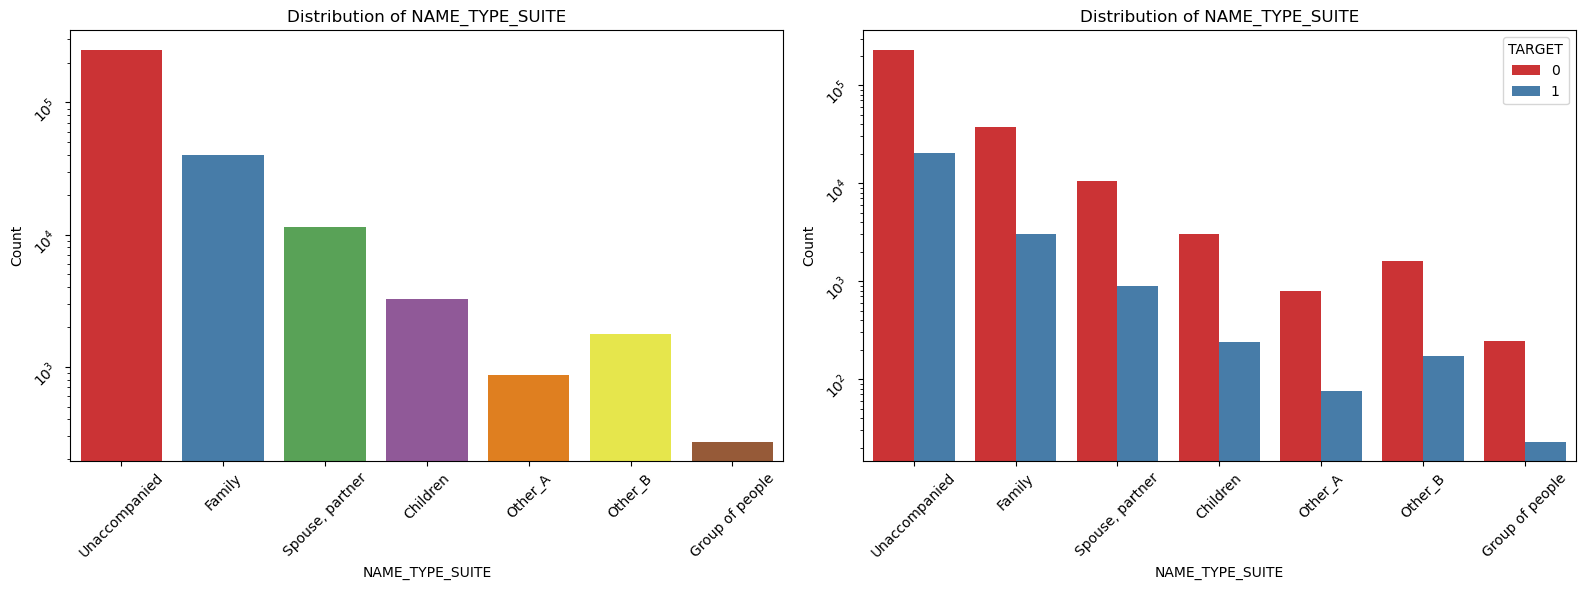

In [92]:
plot_categorical_distributions_side_by_side(df, 'NAME_TYPE_SUITE',"NAME_TYPE_SUITE")

This variable denotes who was accompanying client when he was applying for the loan. For both Target 0 and Target 1 the distribution is almost same and most of the client came alone during loan application.

# Numerical columns

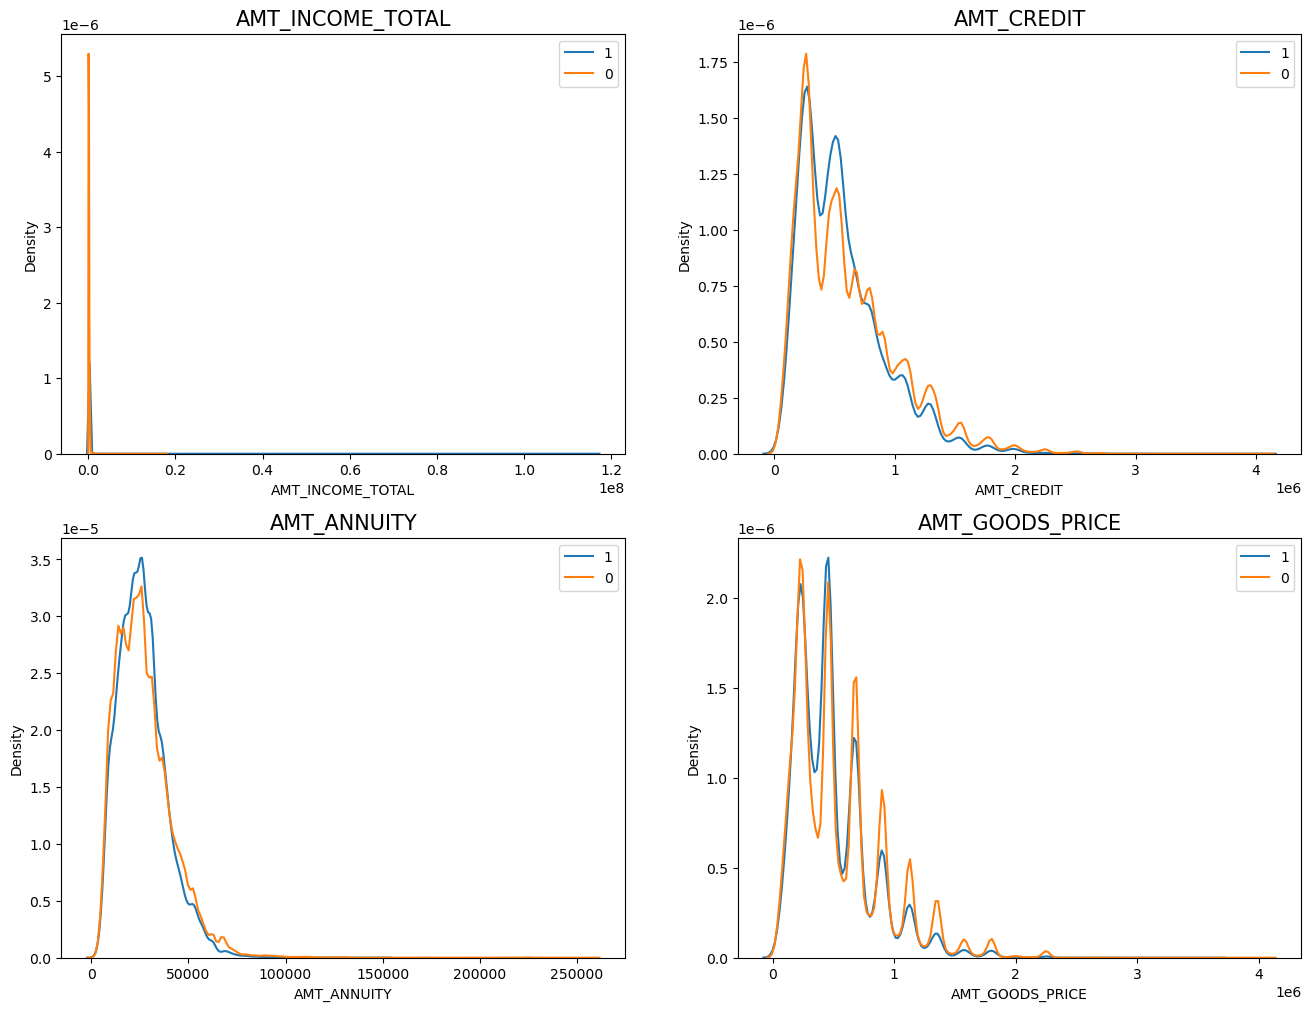

In [89]:
def plot_bivariate_distributions(df, columns, target_column):
    fig = plt.figure(figsize=(16, 12))
    for i, column in enumerate(columns):
        plt.subplot(2, 2, i + 1)
        sns.distplot(df[df[target_column] == 1][column], hist=False, label="1")
        sns.distplot(df[df[target_column] == 0][column], hist=False, label="0")
        plt.title(column, fontdict={'fontsize': 15, 'fontweight': 5})
        plt.legend()
    plt.show()


selected_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
plot_bivariate_distributions(df, selected_columns, 'TARGET')

Loan Amount vs. Goods Price:

* The majority of loans are granted for goods prices below 1 million.
 * This suggests that most borrowers are seeking loans for relatively lower-priced goods.
 
Annuity vs. Credit Amount:

*  Most borrowers pay an annuity below 50,000 for their credit loans.
* This indicates that the majority of borrowers are managing their loan repayments with relatively lower annuity amounts.

Credit Amount Distribution:

* The credit amount of the loan is mostly less than 1 million.
* This further reinforces the observation that borrowers tend to seek loans for smaller amounts.

The distributions of repayers and defaulters overlap in all the plots, indicating that there isn't a clear distinction between the two groups based solely on these individual variables.It is challenging to make a decision solely based on these individual variables, highlighting the need for further analysis and potentially additional variables to assess loan repayment risk effectively.

# Bivariate Analysis

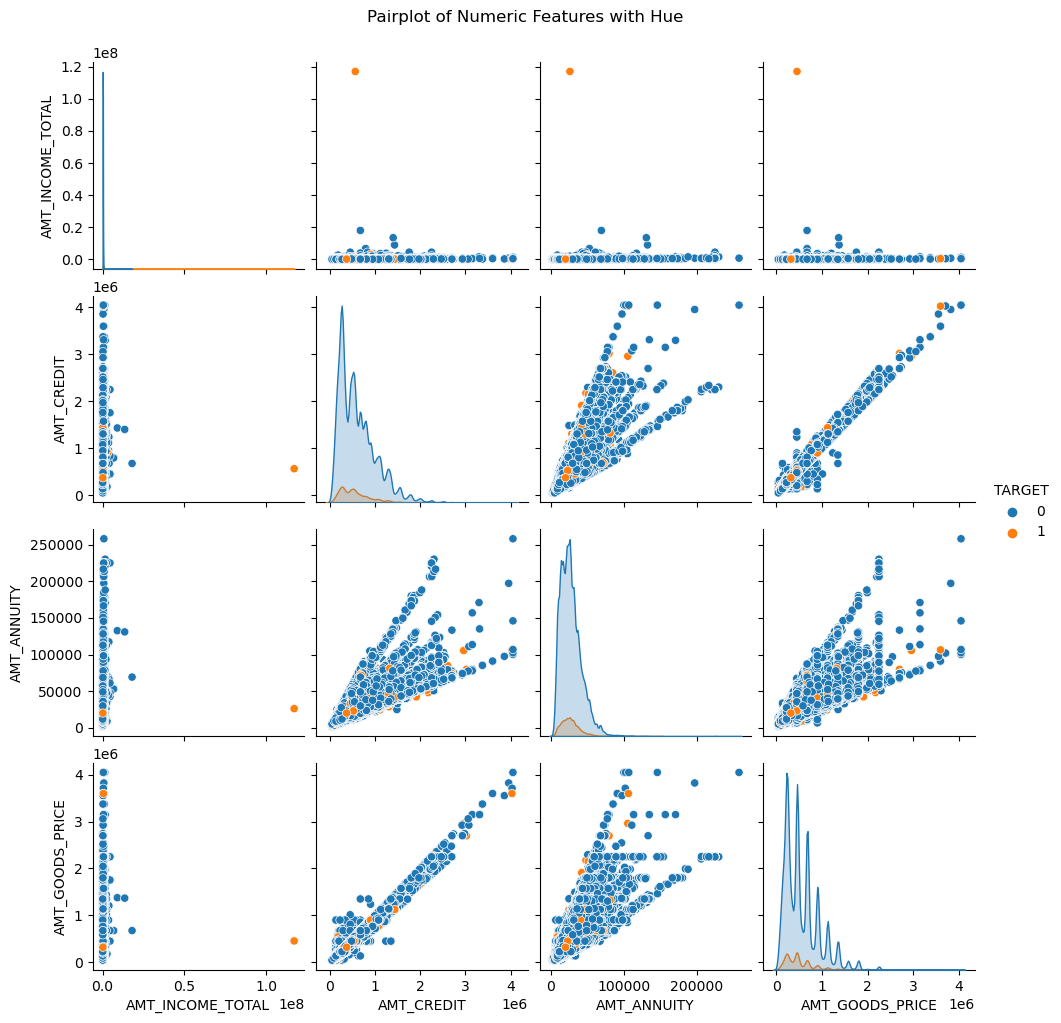

In [93]:
columns_of_interest = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Create a pairplot with hue as 'TARGET'
sns.pairplot(df, vars=columns_of_interest, hue='TARGET', diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features with Hue', y=1.02)
plt.show()

# Loan Default Analysis

* Annuity and Goods Price Influence
When the Annuity Amount surpasses 15,000 and the Goods Price Amount exceeds 20 lakhs, there seems to be a diminished likelihood of loan default. This observation implies that clients with higher annuity and goods price values exhibit a higher degree of reliability in terms of repaying loans. This trend suggests a positive correlation between elevated financial commitments, as indicated by the Annuity Amount, and the substantial value of goods financed, leading to a reduced risk of default among this particular subset of clients.

* Loan Amount and Goods Price
The Loan Amount (AMT_CREDIT) and Goods Price (AMT_GOODS_PRICE) exhibit a strong correlation, evident from the scatterplot where data points are densely concentrated along a linear trend. This high correlation suggests that clients typically borrow an amount closely aligned with the price of the goods they intend to purchase. In other words, there is a consistent relationship between the loan amount extended to clients and the corresponding value of the goods they are financing.

* Defaulters for High Loan Amounts
The data analysis indicates a noteworthy trend: there are relatively few defaulters among clients who have borrowed amounts exceeding 2 million. This suggests that there may be a correlation between borrowing larger sums and a lower likelihood of loan default. However, it's crucial to emphasize that this observation is based solely on the available data and does not necessarily imply causation.

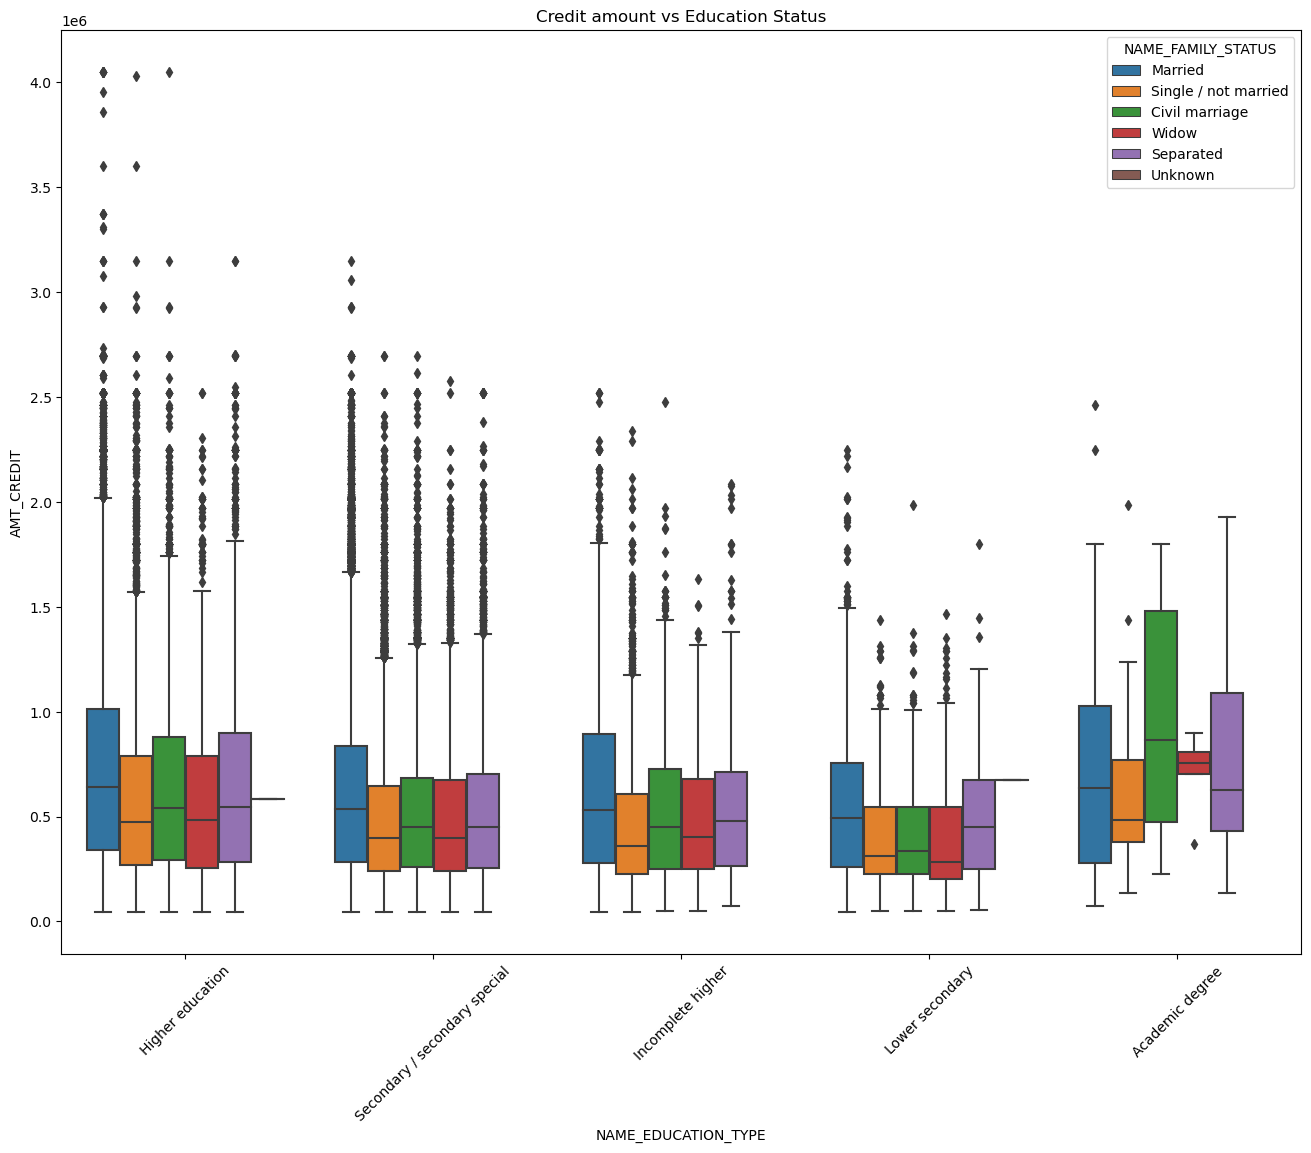

In [94]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df[df.TARGET==0], x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

# Insights 

* Academic Degree Education with Family Status:
Clients with family statuses such as 'civil marriage,' 'marriage,' and 'separated' who have achieved an 'Academic degree' education tend to exhibit a higher frequency of credit applications. This suggests that individuals with advanced academic qualifications in these specific family statuses are more active in seeking credit.

* Higher Education with Family Status and Credit Application Variation:
Among clients with 'Higher education,' family statuses including 'marriage,' 'single,' and 'civil marriage' display more outliers in their credit application amounts. The presence of outliers indicates greater variability in the credit amounts sought by individuals in these family statuses. This variability could be influenced by diverse financial needs or circumstances within these family structures.

* Civil Marriage Status and Academic Degree Education Preference for Higher Credit:
Notably, clients with 'Civil marriage' status and an 'Academic degree' education predominantly fall within the third quartile range for credit application amounts. This concentration in the upper range of credit amounts suggests a preference for higher credit limits among individuals with a combination of 'Civil marriage' status and an 'Academic degree' education.

# Multivariate

 # Pairplot for Target 0 (Loan-Non Payment Difficulties)

In [100]:
Target0 = df.loc[df["TARGET"]==0]
Target1 = df.loc[df["TARGET"]==1]

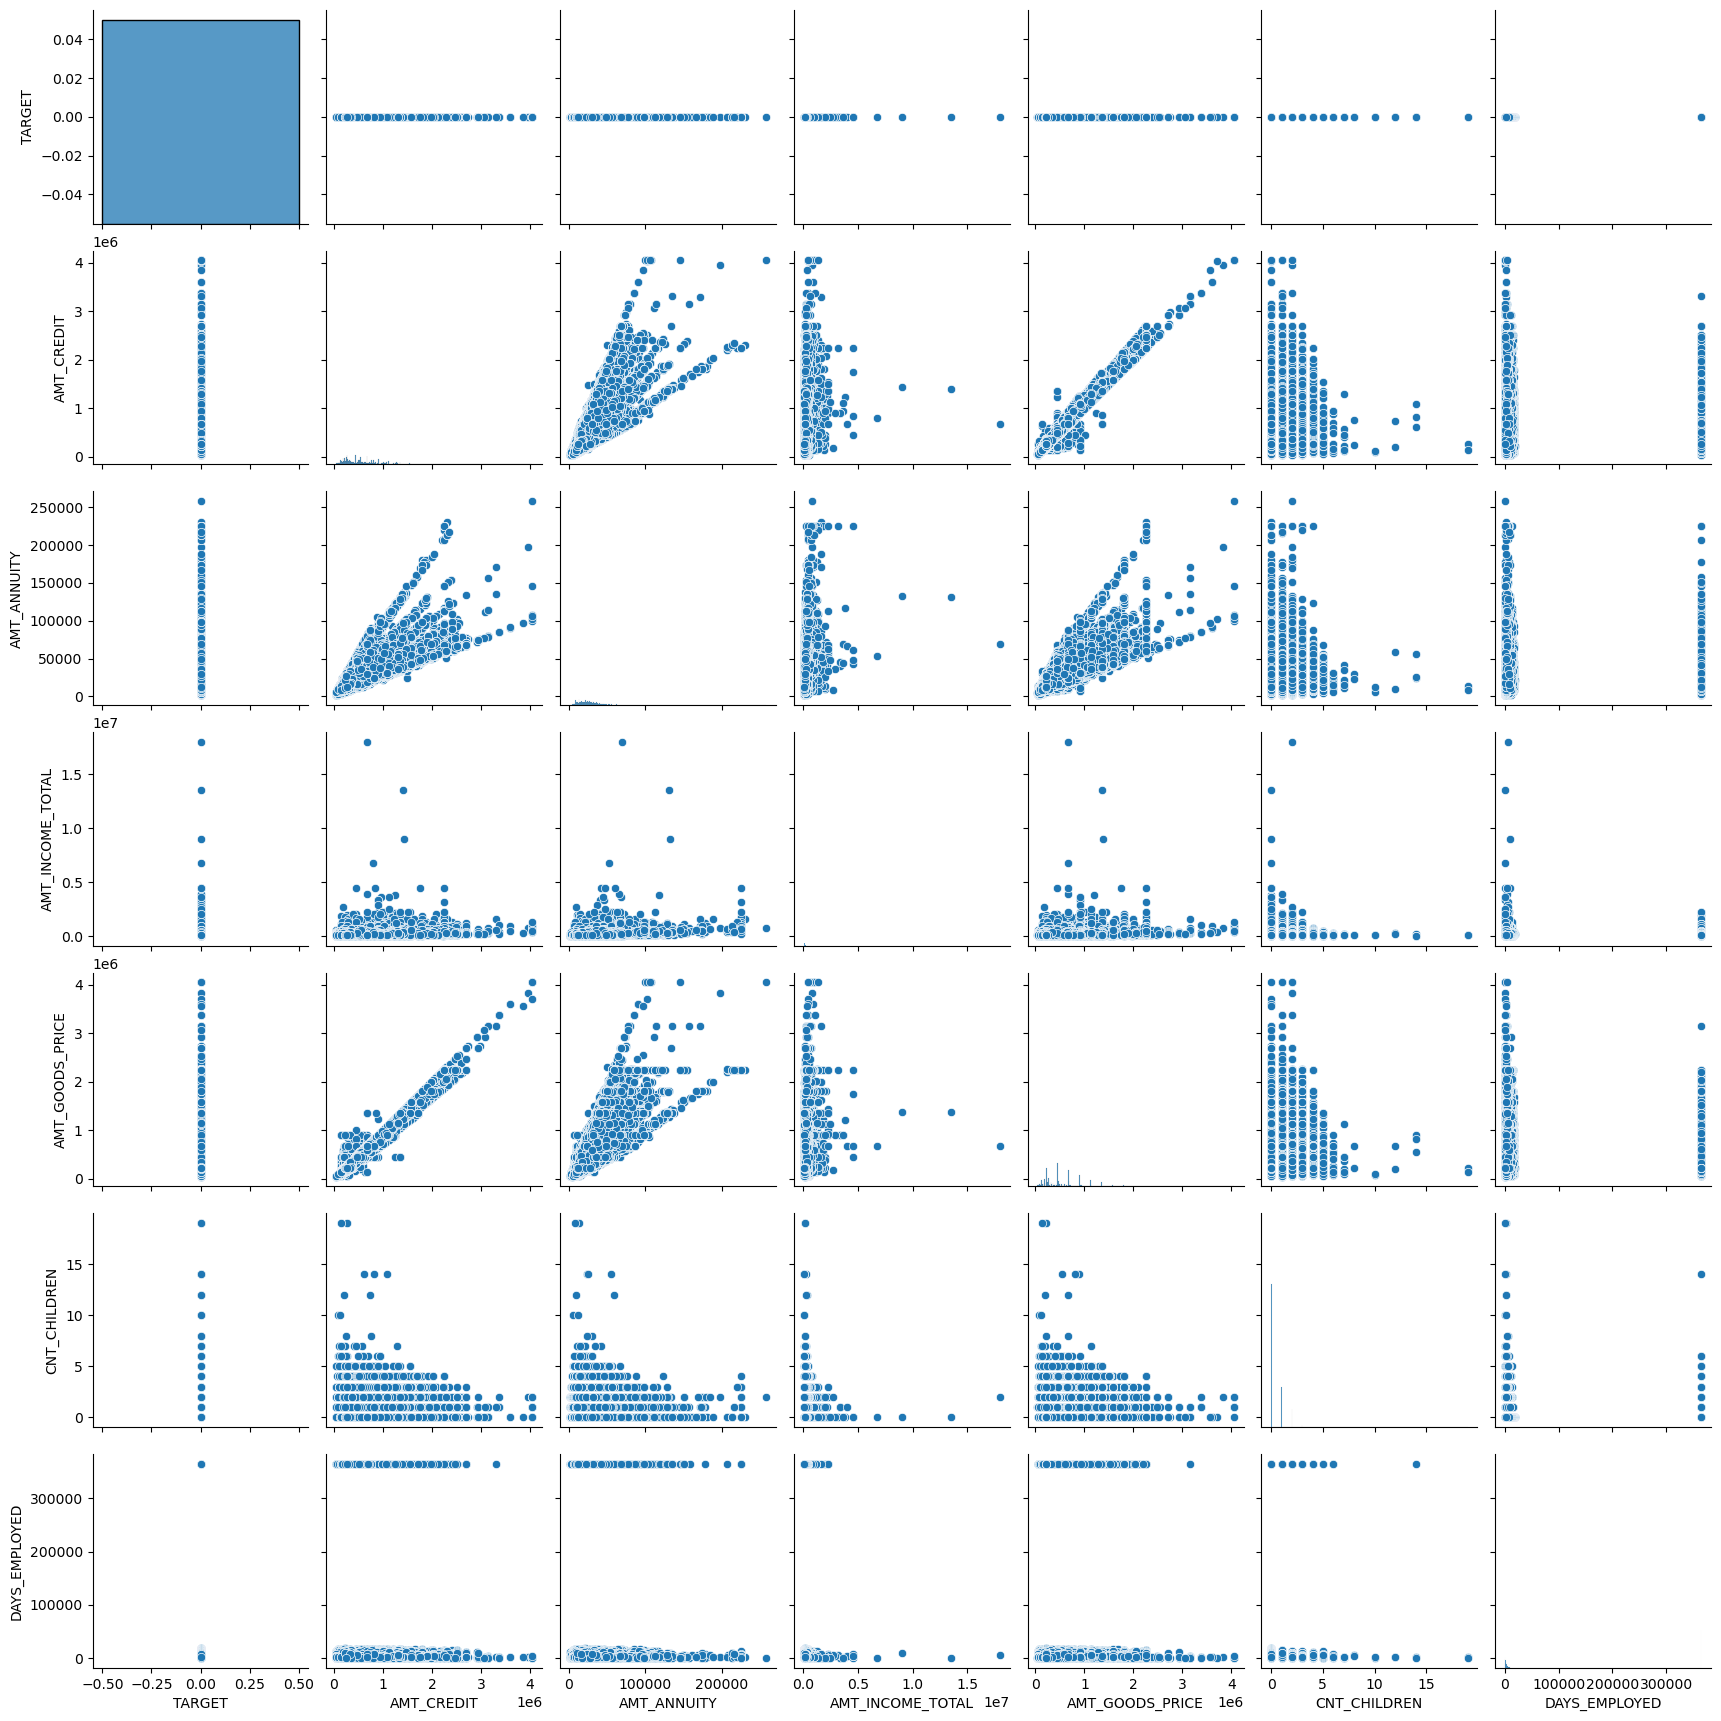

In [102]:
pair = Target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

# Pairplot for Target 1 (Loan-Payment Difficulties)

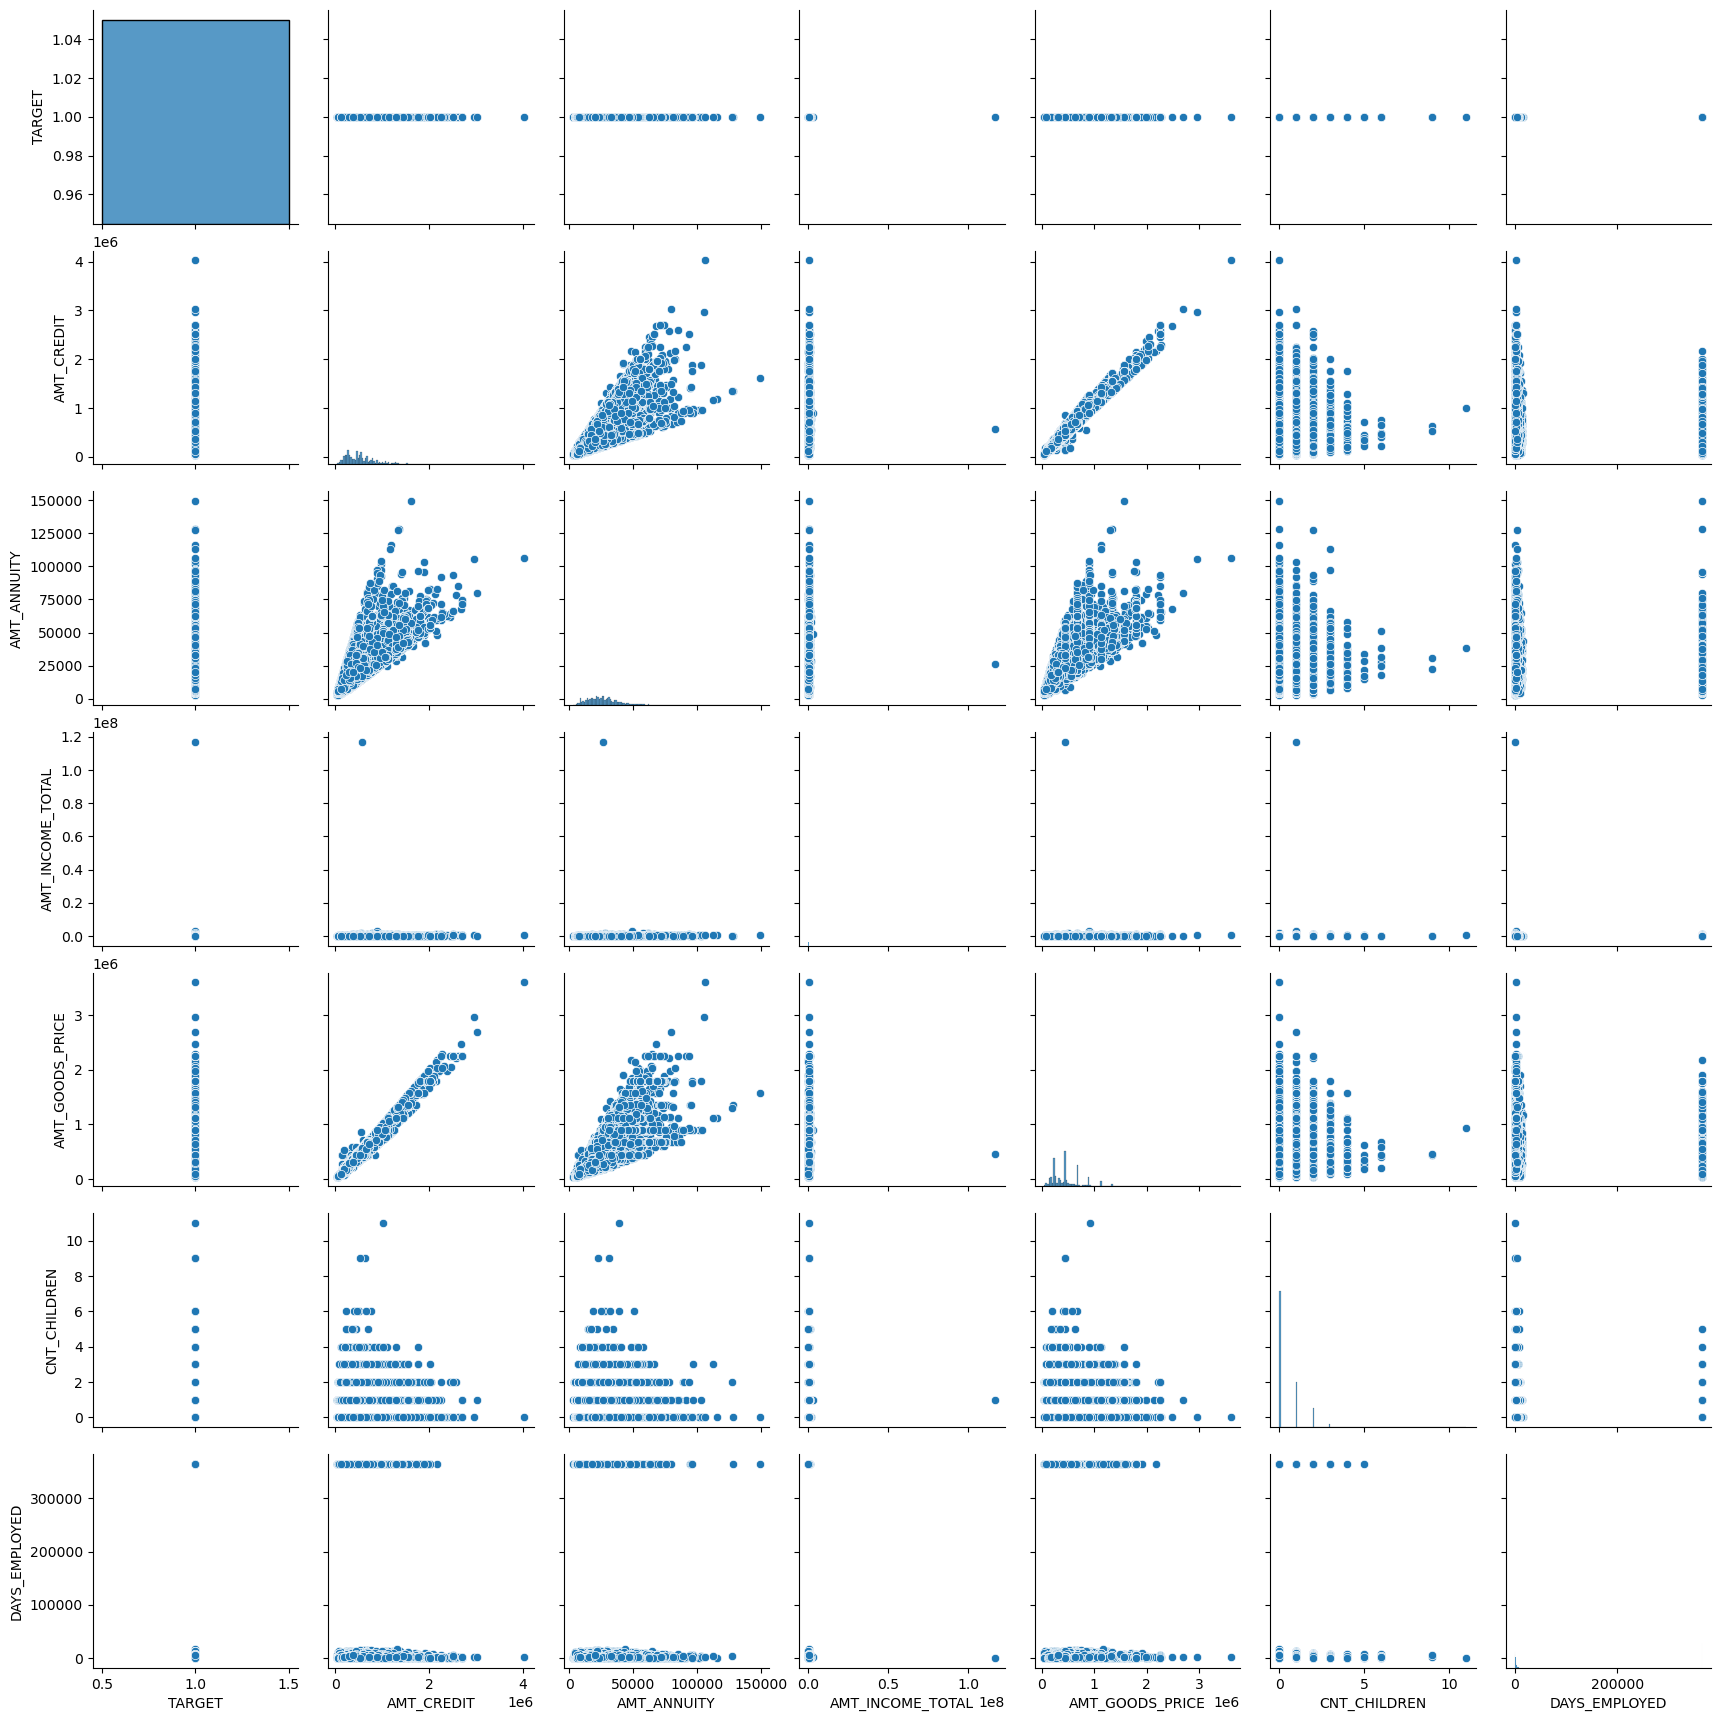

In [103]:
pair = Target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

# Target

<Axes: xlabel='TARGET', ylabel='count'>

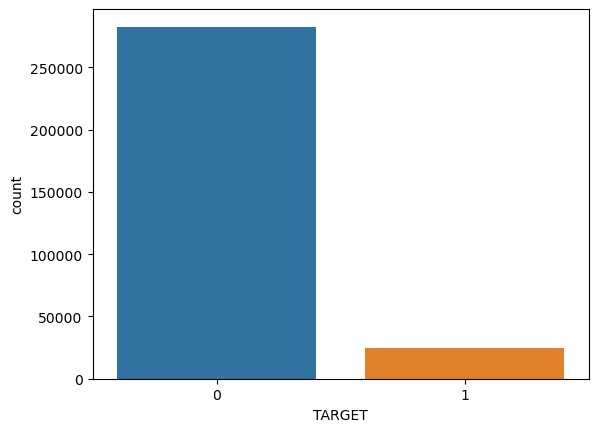

In [109]:
sns.countplot(data=df,x="TARGET")

# Encoding 

In [ ]:
# Converting categorical data into numerical data

In [68]:
df.select_dtypes(include='O').head()


NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE  
0  Business Entity Type 3  
1                  School  
2              Government  
3  Business Entity Type 3  
4                Religion

# Manual Encoding

In [69]:
df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [70]:
df.CODE_GENDER.replace({"F":1,"M":0},inplace=True)

In [71]:
df.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [72]:
df.FLAG_OWN_CAR.replace({"Y":1,"N":0},inplace=True)

In [73]:
df.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [74]:
df.FLAG_OWN_REALTY.replace({"Y":1,"N":0},inplace=True)

# Using label encoder to convert the categorical data to numerical data


In [75]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df.NAME_CONTRACT_TYPE=lc.fit_transform(df.NAME_CONTRACT_TYPE)
df.NAME_TYPE_SUITE=lc.fit_transform(df.NAME_TYPE_SUITE)
df.NAME_INCOME_TYPE=lc.fit_transform(df.NAME_INCOME_TYPE)
df.NAME_EDUCATION_TYPE=lc.fit_transform(df.NAME_EDUCATION_TYPE)
df.NAME_FAMILY_STATUS=lc.fit_transform(df.NAME_FAMILY_STATUS)
df.NAME_HOUSING_TYPE=lc.fit_transform(df.NAME_HOUSING_TYPE)
df.OCCUPATION_TYPE=lc.fit_transform(df.OCCUPATION_TYPE)
df.WEEKDAY_APPR_PROCESS_START=lc.fit_transform(df.WEEKDAY_APPR_PROCESS_START)
df.ORGANIZATION_TYPE=lc.fit_transform(df.ORGANIZATION_TYPE)

In [76]:
df.head(3)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    513531.0      24700.5   
1                0             0          270000.0    513531.0      35698.5   
2                1             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         450000.0                6                 7                    4   
1         450000.0                1                 4                    1   
2         135000.0                6                 7                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   3                  1                    0.018801   
1                   1                  1                    0.003541   
2                   3                  1                    0.010032   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0            637             3648.0             2120           1   
1           1188             1186.0              291           1   
2            225             4260.0             2531           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                8              1.0                     2   
1                3              2.0                     1   
2                8              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           6   
1                            1                           1   
2                            2                           1   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

   ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0                  5      0.262949      0.139376                       2.0   
1                 40      0.622246      0.535276                       1.0   
2                 11      0.555912      0.729567                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
0                       2.0                    1134                0   
1                       0.0                     828                0   
2                       0.0                     815                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0       

# Scaling

In [77]:
# Scaling is important to transform continuos data into certain scale

In [78]:
# min max scaler 
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]=scaling.fit_transform(df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])

In [79]:
df.head(3)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          0.567100     1.00000     0.090032   
1                0             0          0.783550     1.00000     0.132924   
2                1             0          0.134199     0.19209     0.020025   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         1.000000                6                 7                    4   
1         1.000000                1                 4                    1   
2         0.230769                6                 7                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   3                  1                    0.018801   
1                   1                  1                    0.003541   
2                   3                  1                    0.010032   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0            637             3648.0             2120           1   
1           1188             1186.0              291           1   
2            225             4260.0             2531           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                8              1.0                     2   
1                3              2.0                     1   
2                8              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           6   
1                            1                           1   
2                            2                           1   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

   ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0                  5      0.262949      0.139376                       2.0   
1                 40      0.622246      0.535276                       1.0   
2                 11      0.555912      0.729567                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
0                       2.0                    1134                0   
1                       0.0                     828                0   
2                       0.0                     815                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0       

In [80]:
# Feature Engineering

In [81]:
# Check for multicollinearity
df.corr()

SK_ID_CURR    TARGET  NAME_CONTRACT_TYPE  \
SK_ID_CURR                    1.000000 -0.002108            0.001654   
TARGET                       -0.002108  1.000000           -0.030896   
NAME_CONTRACT_TYPE            0.001654 -0.030896            1.000000   
CODE_GENDER                   0.000728 -0.054713            0.008783   
FLAG_OWN_CAR                  0.001216 -0.021851            0.004022   
...                                ...       ...                 ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.001879 -0.001306           -0.014769   
AMT_REQ_CREDIT_BUREAU_MON     0.000328 -0.014794           -0.014341   
AMT_REQ_CREDIT_BUREAU_QRT     0.000809 -0.005833           -0.021448   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004071  0.012161           -0.049643   
AGE                           0.001483 -0.078263           -0.086453   

                            CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
SK_ID_CURR                     0.000728      0.001216         0.000703   
TARGET                        -0.054713     -0.021851        -0.006148   
NAME_CONTRACT_TYPE             0.008783      0.004022         0.067177   
CODE_GENDER                    1.000000     -0.345841         0.044380   
FLAG_OWN_CAR                  -0.345841      1.000000        -0.002817   
...                                 ...           ...              ...   
AMT_REQ_CREDIT_BUREAU_WEEK     0.002862      0.002822         0.005801   
AMT_REQ_CREDIT_BUREAU_MON     -0.005767      0.023536        -0.006163   
AMT_REQ_CREDIT_BUREAU_QRT      0.009683     -0.004081         0.012013   
AMT_REQ_CREDIT_BUREAU_YEAR     0.020706     -0.026124         0.058687   
AGE                            0.148007     -0.129804         0.119104   

                            CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                     -0.001129          0.002544    0.000885   
TARGET                          0.019187         -0.014807    0.013779   
NAME_CONTRACT_TYPE              0.029998         -0.047855   -0.272067   
CODE_GENDER                    -0.047382         -0.189533   -0.020039   
FLAG_OWN_CAR                    0.102023          0.194118    0.085294   
...                                  ...               ...         ...   
AMT_REQ_CREDIT_BUREAU_WEEK     -0.001083          0.013822    0.003761   
AMT_REQ_CREDIT_BUREAU_MON      -0.007983          0.067224    0.041347   
AMT_REQ_CREDIT_BUREAU_QRT      -0.004913          0.028154    0.016471   
AMT_REQ_CREDIT_BUREAU_YEAR     -0.034874          0.073368   -0.004739   
AGE                            -0.330812         -0.082994    0.029125   

                            AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  \
SK_ID_CURR                    -0.000431         0.001812         0.000954   
TARGET                        -0.012815         0.003953         0.008319   
NAME_CONTRACT_TYPE            -0.241541        -0.208800         0.012007   
CODE_GENDER                   -0.076993        -0.019780        -0.030013   
FLAG_OWN_CAR                   0.141587         0.090972         0.004256   
...                                 ...              ...              ...   
AMT_REQ_CREDIT_BUREAU_WEEK     0.013494         0.001760         0.003250   
AMT_REQ_CREDIT_BUREAU_MON      0.037171         0.043310         0.011662   
AMT_REQ_CREDIT_BUREAU_QRT      0.010685         0.015779         0.004807   
AMT_REQ_CREDIT_BUREAU_YEAR    -0.008286        -0.012383         0.011559   
AGE                           -0.009390         0.029807        -0.036657   

                            NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
SK_ID_CURR                         -0.002112            -0.000529   
TARGET                              0.046829             0.054699   
NAME_CONTRACT_TYPE                  0.005428            -0.065086   
CODE_GENDER                        -0.065076            -0.009573   
FLAG_OWN_CAR                        0.033186            -0.093977   
...                                      ...  

<Axes: >

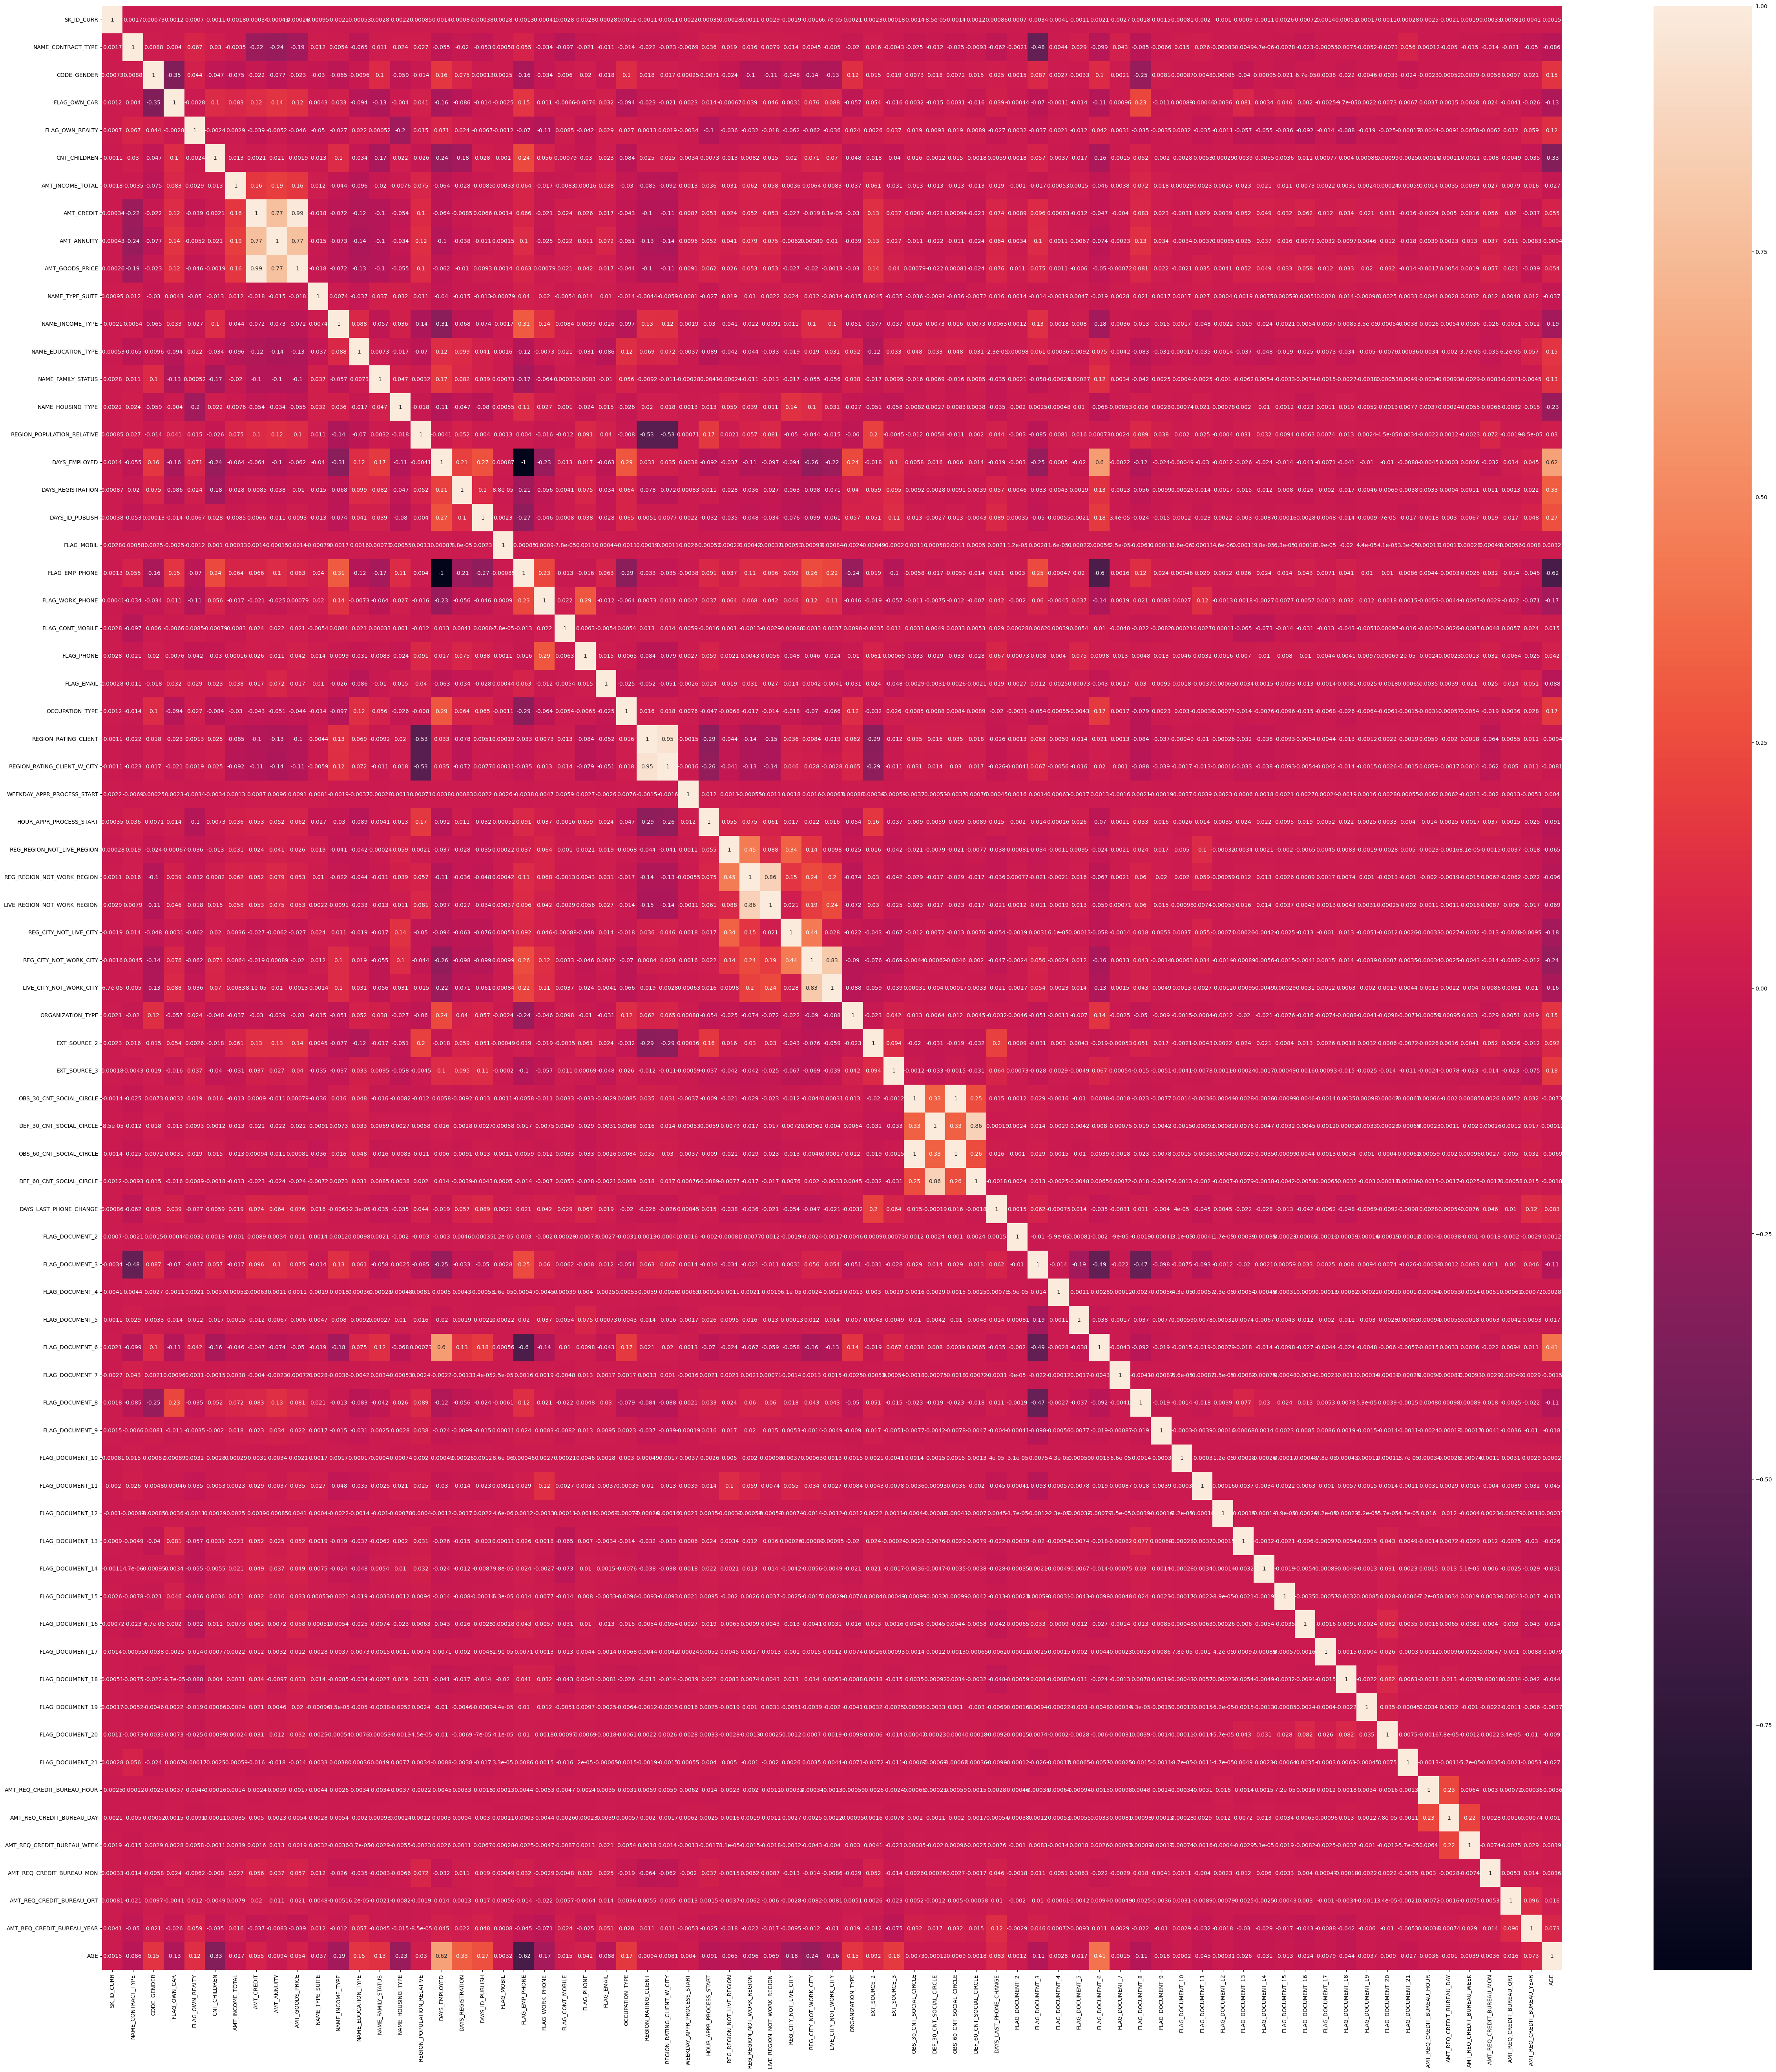

In [150]:
# draw graph
plt.figure(figsize=(60,65))
sns.heatmap(df.drop("TARGET",axis=1).corr(),annot=True)

Highly Correlated Variables
AMT_CREDIT and AMT_GOODS_PRICE =0.99
REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT = 0.95
CNT_FAM_MEMBERS and CNT_CHILDREN = 0.87
AMT_ANNUITY and AMT_CREDIT = 0.77

In [151]:
# Removing unwanted columns so that will not get confused and our Data looks Clear

In [82]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [83]:
df.drop(labels=unwanted,axis=1,inplace=True)

In [154]:
# Correlation of People defaulting

<Axes: >

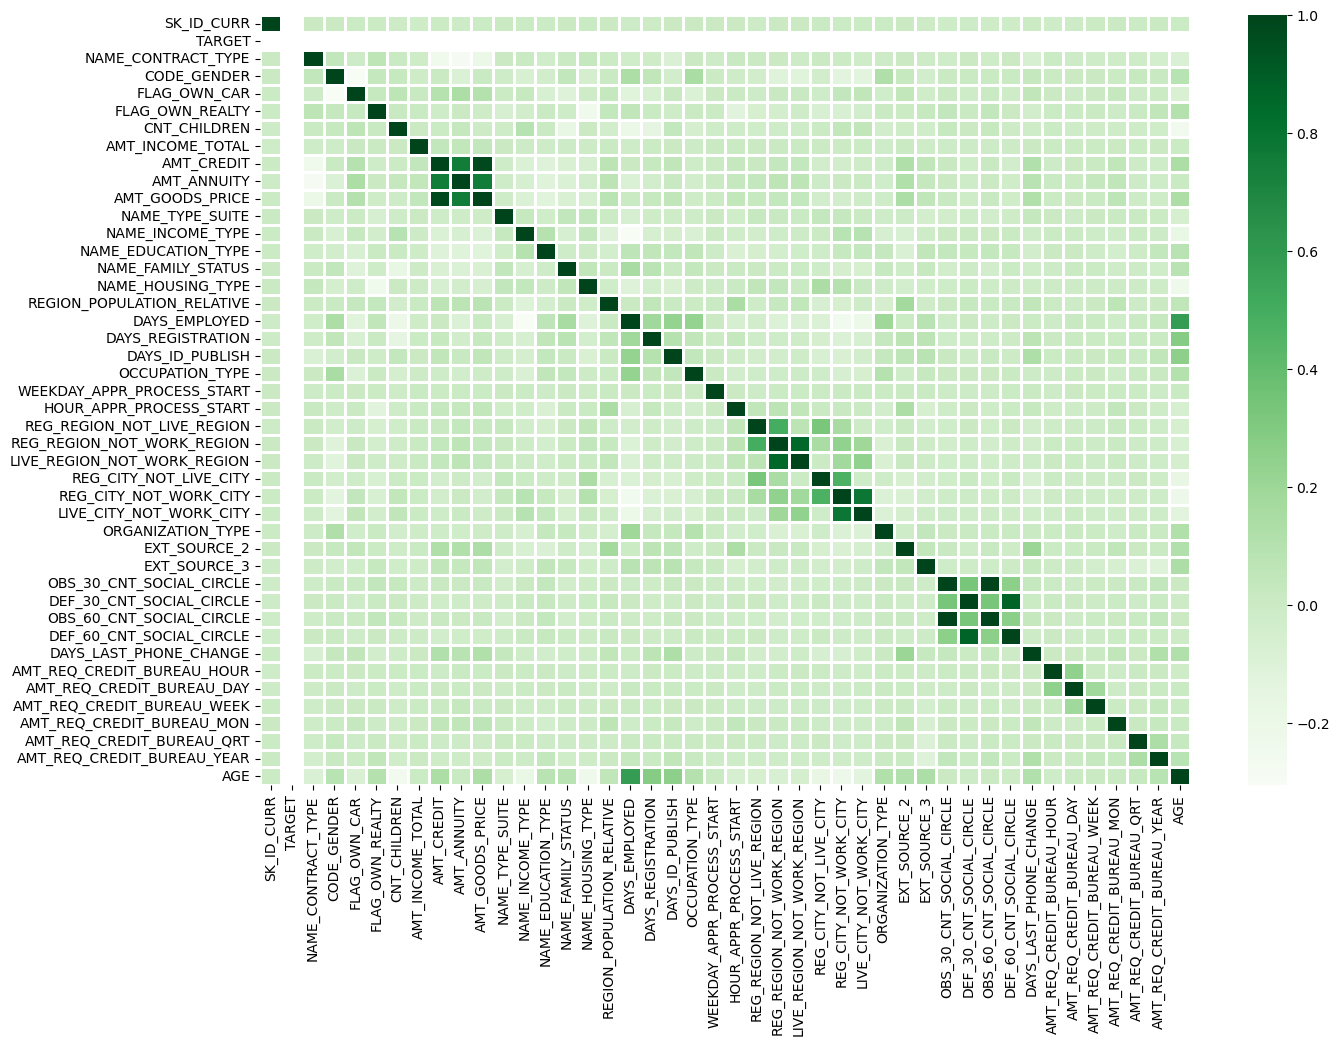

In [156]:
df_corr=df.loc[df.TARGET == 1]
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(),cmap="Greens",linewidths=1)

<Axes: >

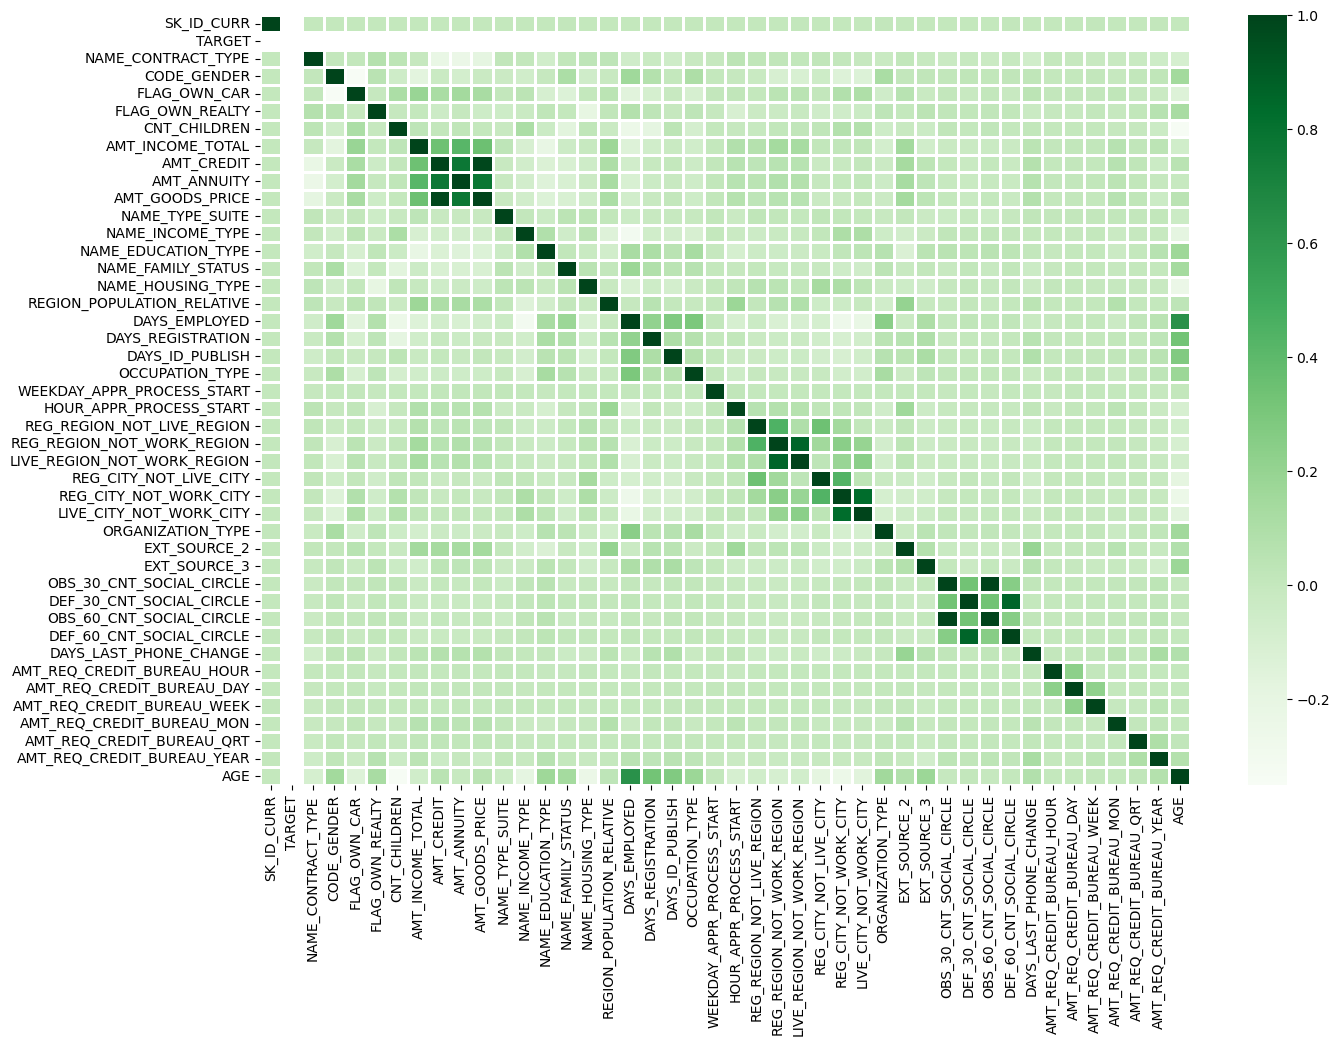

In [157]:
df_corr=df.loc[df.TARGET==0]
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(),cmap="Greens",linewidths=1)

### Correlating Factors

* Credit Amount and Goods Price Correlation:

 The credit amount is highly correlated with the goods price amount.
 This correlation remains consistent among both repayers and defaulters.
 
* Loan Annuity and Credit Amount Correlation:

 The correlation between loan annuity and credit amount shows a slight reduction in defaulters compared to repayers.
 This implies that, while there is still a positive correlation, defaulters tend to have a slightly weaker association between loan annuity and credit amount.
 
* Days Employed Correlation:

 Repayers exhibit a higher correlation with the number of days employed compared to defaulters.
 This suggests that the stability of employment might play a more significant role for individuals who successfully repay loans.

* Total Income and Credit Amount Correlation:

 Among defaulters, there is a significant drop in the correlation between the total income of the client and the credit amount.
 Among repayers, this correlation remains relatively strong.
 This indicates that, for defaulters, the correlation between income and credit amount is weaker compared to repayers.
 
* Social Circle Correlation:
 
 The correlation between the social circle and defaulting shows a slight increase among defaulters compared to repayers.
 This implies that the social circle might have a slightly stronger impact on defaulting behavior among this specific population.


In [84]:
df.head(3)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          0.567100     1.00000     0.090032   
1                0             0          0.783550     1.00000     0.132924   
2                1             0          0.134199     0.19209     0.020025   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         1.000000                6                 7                    4   
1         1.000000                1                 4                    1   
2         0.230769                6                 7                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   3                  1                    0.018801   
1                   1                  1                    0.003541   
2                   3                  1                    0.010032   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  \
0            637             3648.0             2120                8   
1           1188             1186.0              291                3   
2            225             4260.0             2531                8   

   CNT_FAM_MEMBERS  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0              1.0                           6                       10   
1              2.0                           1                       11   
2              1.0                           1                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 40   
2                       0                        0                 11   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.535276                       1.0   
2      0.555912      0.729567                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                    1134   
1                       0.0                     828   
2                       0.0                     815   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE    INCOME_GROUP  \
0                        0.0                         1.0   26  180k to 202.5k   
1                        0.0                         0.0   46    225k to 117M   
2                 

In [85]:
df.shape

(307511, 48)

In [88]:
df1=df.drop(['INCOME_GROUP','AGE_GROUP','EMPLOYMENT_BINS'],axis=1) # since we created bins for the EDA process so know we 
# can drop the column

In [89]:
df1.head(3)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          0.567100     1.00000     0.090032   
1                0             0          0.783550     1.00000     0.132924   
2                1             0          0.134199     0.19209     0.020025   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         1.000000                6                 7                    4   
1         1.000000                1                 4                    1   
2         0.230769                6                 7                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   3                  1                    0.018801   
1                   1                  1                    0.003541   
2                   3                  1                    0.010032   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  \
0            637             3648.0             2120                8   
1           1188             1186.0              291                3   
2            225             4260.0             2531                8   

   CNT_FAM_MEMBERS  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0              1.0                           6                       10   
1              2.0                           1                       11   
2              1.0                           1                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 40   
2                       0                        0                 11   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.535276                       1.0   
2      0.555912      0.729567                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                    1134   
1                       0.0                     828   
2                       0.0                     815   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE  
0                        0.0                         1.0   26  
1                        0.0                         0.0   46  
2                        0.0                         0.0   52

# Insights on application_data

* Gender Disparity:

The dataset reveals a significant disproportion in the number of female and male clients, with a higher representation of females. Intriguingly, female clients exhibit a lower likelihood of encountering payment difficulties compared to their male counterparts. This demographic insight should be integrated into the predictive models, allowing the bank to better assess and anticipate potential loan defaulters.

* Document 6 Submission:

Clients who submit Document 6 during the loan application process demonstrate a lower probability of facing payment difficulties. To enhance risk management, the bank is advised to make Document 6 a mandatory requirement for all loan applications. This strategic move has the potential to curtail defaults and foster a more secure lending environment.

* Car Ownership Impact:

A noteworthy observation indicates that clients owning at least one car are marginally more likely to fulfill loan obligations on time. Considering car ownership as a factor during the loan approval process can serve as a valuable indicator. The bank should take cognizance of this insight, incorporating it into their assessment criteria to better gauge repayment capabilities.

* Educational Attainment Significance:

Clients with a background in "Higher Education" exhibit a higher tendency to repay loans promptly compared to individuals with other educational qualifications. Recognizing education as a pivotal parameter in loan approval can significantly refine risk assessments. The bank should weigh educational levels carefully, giving due consideration to applicants with higher educational qualifications.

* Marital Status and Living Arrangements:

The majority of clients classified as "Married" present a lower likelihood of facing payment difficulties. Conversely, individuals categorized as "Single" or "Widowed" demonstrate a higher risk of loan default. Additionally, clients residing with their parents are more prone to default on loans. Incorporating marital status and living arrangements into the holistic assessment process will bolster the bank's ability to identify potential risk factors and make informed lending decisions.

* Age and Income Impact:

Individuals falling within the age group of 20-40, particularly in the Low and Higher-Medium income brackets, face a higher likelihood of payment difficulties. Specifically, those holding occupations as Laborers within this demographic are particularly susceptible. Consequently, applicants meeting these criteria should undergo a more thorough validation process on additional parameters before loan approval, ensuring a comprehensive risk assessment.

* Occupation Type Significance:

Laborers, constituting a significant portion of the client base, exhibit a heightened challenge in repaying loans when compared to individuals in higher-paying professions such as Managers, Accountants, Core Staff, and High-Skill Tech Staff. Given this disparity, the bank is advised to incorporate an applicant's current job status as a critical factor in the loan approval process. This targeted approach allows for a more nuanced evaluation, taking into account the financial stability associated with different occupation types.

* Pensioner Favorability:

Pensioners emerge as a noteworthy segment demonstrating a higher likelihood of loan repayment compared to other income classes. The stable and fixed nature of pension income contributes to this trend, fostering a calculated approach to loan amounts and monthly installment affordability. Recognizing the relative profitability of catering to pensioner clients, the bank is encouraged to actively engage and welcome pensioners as a preferred demographic. This approach aligns with the bank's interests, considering the predictable nature of pensioner income.

# Loading Data "previous_application.csv"

In [90]:
df2 = pd.read_csv('previous_application.csv')

In [91]:
df2.head(3)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0

In [92]:
df2.tail(3)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1670211           0.101401                    NaN                       NaN   
1670212                NaN                    NaN                       NaN   
1670213                NaN                    NaN                       NaN   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
1670211                    XAP             Approved          -1488   
1670212                    XNA             Approved          -1185   
1670213                    XNA             Approved          -1193   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
1670211  Cash through the bank                XAP  Spouse, partner   
1670212  Cash through the bank                XAP           Family   
1670213  Cash through the bank                XAP           Family   

        NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
1670211         Repeater  Consumer Electronics            POS   
1670212         Repeater                   XNA           Cash   
1670213         Repeater                   XNA           Cash   

        NAME_PRODUCT_TYPE     CHANNEL_TYPE  SELLERPLACE_AREA  \
1670211               XNA     Country-wide              1370   
1670212            x-sell  AP+ (Cash loan)                -1   
1670213            x-sell  AP+ (Cash loan)                -1   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
1670211  Consumer electronics         10.0       low_normal   
1670212                   XNA         12.0       low_normal   
1670213                   XNA         48.0           middle   

                 PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
1670211  POS household with interest            365243.0         -1457.0   
1670212             Cash X-Sell: low            365243.0         -1155.0   
1670213          Cash X-Sell: middle            365243.0         -1163.0   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
1670211                    -1187.0        -1187.0           -1181.0   
1670212                     -825.0         -825.0            -817.0   
1670213                      247.0         -443.0            -423.0   

         NFLAG_INSURED_ON_APPROVAL  
1670211                        0.0  
1670212                        1.0  
1670213                        0.0

In [93]:
df2.shape

(1670214, 37)

In [94]:
df2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [95]:
df2.size

61797918

In [96]:
df2.describe().T

count          mean            std  \
SK_ID_PREV                 1670214.0  1.923089e+06  532597.958696   
SK_ID_CURR                 1670214.0  2.783572e+05  102814.823849   
AMT_ANNUITY                1297979.0  1.595512e+04   14782.137335   
AMT_APPLICATION            1670214.0  1.752339e+05  292779.762387   
AMT_CREDIT                 1670213.0  1.961140e+05  318574.616546   
AMT_DOWN_PAYMENT            774370.0  6.697402e+03   20921.495410   
AMT_GOODS_PRICE            1284699.0  2.278473e+05  315396.557937   
HOUR_APPR_PROCESS_START    1670214.0  1.248418e+01       3.334028   
NFLAG_LAST_APPL_IN_DAY     1670214.0  9.964675e-01       0.059330   
RATE_DOWN_PAYMENT           774370.0  7.963682e-02       0.107823   
RATE_INTEREST_PRIMARY         5951.0  1.883569e-01       0.087671   
RATE_INTEREST_PRIVILEGED      5951.0  7.735025e-01       0.100879   
DAYS_DECISION              1670214.0 -8.806797e+02     779.099667   
SELLERPLACE_AREA           1670214.0  3.139511e+02    7127.443459   
CNT_PAYMENT                1297984.0  1.605408e+01      14.567288   
DAYS_FIRST_DRAWING          997149.0  3.422099e+05   88916.115834   
DAYS_FIRST_DUE              997149.0  1.382627e+04   72444.869708   
DAYS_LAST_DUE_1ST_VERSION   997149.0  3.376777e+04  106857.034789   
DAYS_LAST_DUE               997149.0  7.658240e+04  149647.415123   
DAYS_TERMINATION            997149.0  8.199234e+04  153303.516729   
NFLAG_INSURED_ON_APPROVAL   997149.0  3.325702e-01       0.471134   

                                    min           25%           50%  \
SK_ID_PREV                 1.000001e+06  1.461857e+06  1.923110e+06   
SK_ID_CURR                 1.000010e+05  1.893290e+05  2.787145e+05   
AMT_ANNUITY                0.000000e+00  6.321780e+03  1.125000e+04   
AMT_APPLICATION            0.000000e+00  1.872000e+04  7.104600e+04   
AMT_CREDIT                 0.000000e+00  2.416050e+04  8.054100e+04   
AMT_DOWN_PAYMENT          -9.000000e-01  0.000000e+00  1.638000e+03   
AMT_GOODS_PRICE            0.000000e+00  5.084100e+04  1.123200e+05   
HOUR_APPR_PROCESS_START    0.000000e+00  1.000000e+01  1.200000e+01   
NFLAG_LAST_APPL_IN_DAY     0.000000e+00  1.000000e+00  1.000000e+00   
RATE_DOWN_PAYMENT         -1.497876e-05  0.000000e+00  5.160508e-02   
RATE_INTEREST_PRIMARY      3.478125e-02  1.607163e-01  1.891222e-01   
RATE_INTEREST_PRIVILEGED   3.731501e-01  7.156448e-01  8.350951e-01   
DAYS_DECISION             -2.922000e+03 -1.300000e+03 -5.810000e+02   
SELLERPLACE_AREA          -1.000000e+00 -1.000000e+00  3.000000e+00   
CNT_PAYMENT                0.000000e+00  6.000000e+00  1.200000e+01   
DAYS_FIRST_DRAWING        -2.922000e+03  3.652430e+05  3.652430e+05   
DAYS_FIRST_DUE            -2.892000e+03 -1.628000e+03 -8.310000e+02   
DAYS_LAST_DUE_1ST_VERSION -2.801000e+03 -1.242000e+03 -3.610000e+02   
DAYS_LAST_DUE             -2.889000e+03 -1.314000e+03 -5.370000e+02   
DAYS_TERMINATION          -2.874000e+03 -1.270000e+03 -4.990000e+02   
NFLAG_INSURED_ON_APPROVAL  0.000000e+00  0.000000e+00  0.000000e+00   

                                    75%          max  
SK_ID_PREV                 2.384280e+06  2845382.000  
SK_ID_CURR                 3.675140e+05   456255.000  
AMT_ANNUITY                2.065842e+04   418058.145  
AMT_APPLICATION            1.803600e+05  6905160.000  
AMT_CREDIT                 2.164185e+05  6905160.000  
AMT_DOWN_PAYMENT           7.740000e+03  3060045.000  
AMT_GOODS_PRICE            2.340000e+05  6905160.000  
HOUR_APPR_PROCESS_START    1.500000e+01       23.000  
NFLAG_LAST_APPL_IN_DAY     1.000000e+00        1.000  
RATE_DOWN_PAYMENT          1.089091e-01        1.000  
RATE_INTEREST_PRIMARY      1.933299e-01        1.000  
RATE_INTEREST_PRIVILEGED   8.525370e-01        1.000  
DAYS_DECISION             -2.800000e+02       -1.000  
SELLERPLACE_AREA           8.200000e+01  4000000.000  
CNT_PAYMENT                2.400000e+01       84.000  
DAYS_FIRST_DRAWING         3.652430e+05   365243.000  
DAYS_FIRST_DUE

In [97]:
# to represent the statistical values of categorical values
df2.describe(include='O')

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START  \
count             1670214                    1670214   
unique                  4                          7   
top            Cash loans                    TUESDAY   
freq               747553                     255118   

       FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
count                      1670214                1670214   
unique                           2                     25   
top                              Y                    XAP   
freq                       1661739                 922661   

       NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
count               1670214                1670214            1670214   
unique                    4                      4                  9   
top                Approved  Cash through the bank                XAP   
freq                1036781                1033552            1353093   

       NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
count           849809          1670214             1670214        1670214   
unique               7                4                  28              5   
top      Unaccompanied         Repeater                 XNA            POS   
freq            508970          1231261              950809         691011   

       NAME_PRODUCT_TYPE             CHANNEL_TYPE NAME_SELLER_INDUSTRY  \
count            1670214                  1670214              1670214   
unique                 3                        8                   11   
top                  XNA  Credit and cash offices                  XNA   
freq             1063666                   719968               855720   

       NAME_YIELD_GROUP PRODUCT_COMBINATION  
count           1670214             1669868  
unique                5                  17  
top                 XNA                Cash  
freq             517215              285990

In [186]:
df2.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [98]:
df2.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [100]:
df2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

## Dropping columns with more than 40 % Null values

In [101]:
drop_col=df2.columns[df2.isnull().sum()/df2.shape[0]*100 > 40]
df2.drop(columns=drop_col,inplace=True)
df2.shape

(1670214, 26)

In [102]:
df2.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [ ]:
# Dealing with null values df2 :

In [ ]:
# Positively skewed: Replacing Null with median

In [104]:

df2["AMT_GOODS_PRICE"].fillna(df2["AMT_GOODS_PRICE"].median(),inplace=True)
df2.AMT_ANNUITY.fillna(df2.AMT_ANNUITY.median(),inplace=True)

df2["PRODUCT_COMBINATION"].fillna(df2["PRODUCT_COMBINATION"].mode()[0],inplace=True)
df2['CNT_PAYMENT'].fillna(0, inplace=True)

In [106]:
# Remaing Null Values

null_col_df2=df2.isnull().sum()/len(df2)*100
null_col_df2[null_col_df2 >0]

AMT_CREDIT    0.00006
dtype: float64

# EDA - Exploratory Data Analysis

### Univariate Analysis

## Categorical Variables

In [107]:
def cat_univariate_prev(col, fn_sup=14, fn_s=12, figsize= [10,6], xtick_ro= 0, palette= 'Paired'):
    t_col = float(len(df2))
    sns.set_style("whitegrid")
    fig= plt.figure(figsize= figsize)
    f1_x_label= f'{col}'
    sup_t= f'Count plot for {col}'
    plt.title(sup_t, fontdict= {'fontsize': 14, 'color': 'Teal'})
    plt.xticks(rotation= xtick_ro)
    fig= sns.countplot(data= df2, x= col, palette= palette)
    fig.set_ylabel('Count', fontdict= {'fontsize': fn_s, 'color': 'Teal'})
    fig.set_xlabel(f1_x_label, fontdict= {'fontsize': fn_s, 'color': 'Teal'})
    for patch in fig.patches:
        percentage = '{:.1f}%'.format(100 * patch.get_height()/t_col)
        x = patch.get_x() + patch.get_width()
        y = patch.get_height()
        fig.annotate(percentage, (patch.get_x() + patch.get_width() / 2.,
                patch.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')

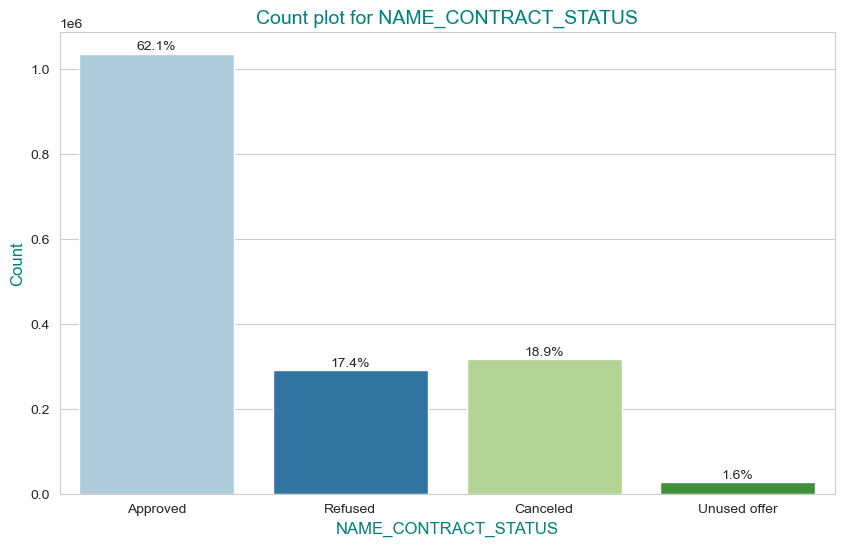

In [108]:
cat_univariate_prev('NAME_CONTRACT_STATUS')

* Most of the loan applications are 'Approved' and only 1.6% are 'Unused offer'
Approved (62.1%): The majority of loan applications were successfully approved, indicating a healthy lending rate.
Canceled (17.4%): Approximately 17% of applicants canceled their loan requests, suggesting the need to explore reasons for such cancellations.
Refused (18.9%): About 19% of applications were denied, highlighting the importance of assessing rejection criteria and applicant profiles.
Unused Offer (1.6%): A small percentage received offers but didn’t proceed, warranting investigation into factors influencing this decision.

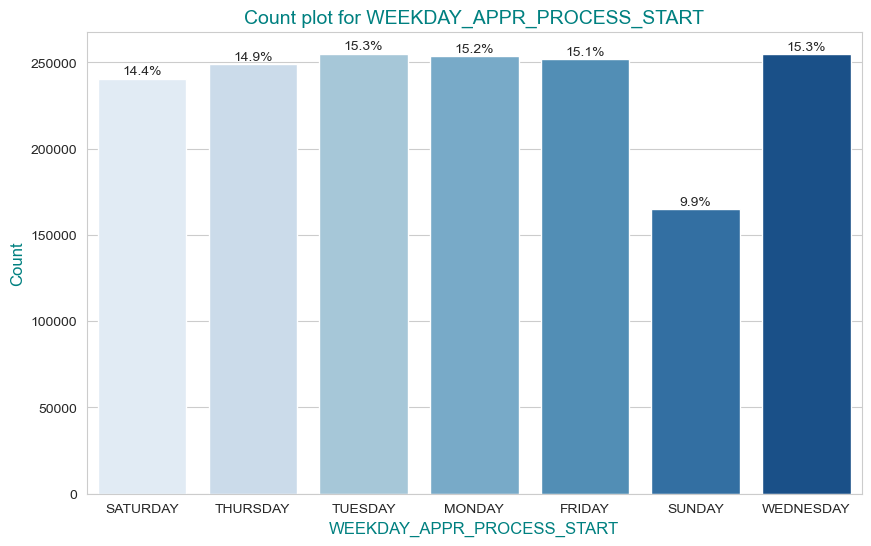

In [109]:
cat_univariate_prev('WEEKDAY_APPR_PROCESS_START', palette= 'Blues')

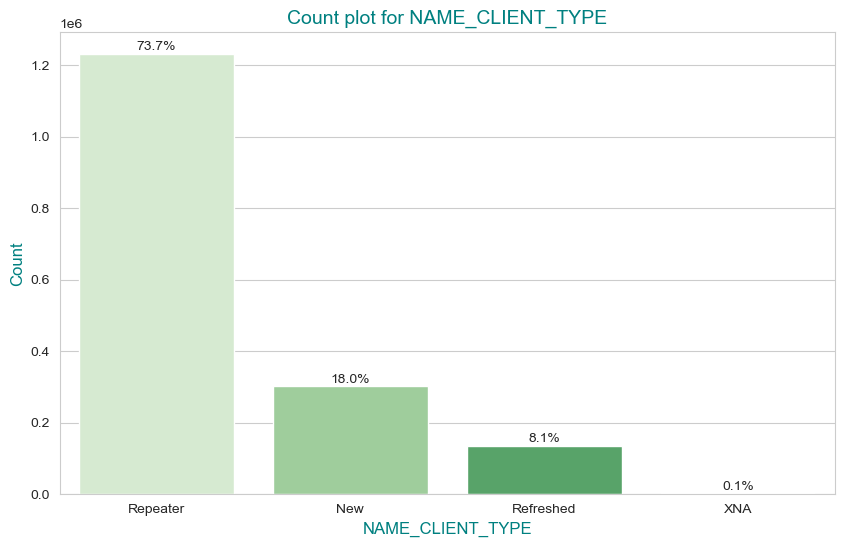

In [110]:
cat_univariate_prev('NAME_CLIENT_TYPE', palette= 'Greens')

Repeater: 73.7% of clients fall into this category.
New: Approximately 18.0% of clients are categorized as “New.”
Refreshed: About 8.1% of clients are classified as “Refreshed.”
XNA: A very small percentage, only 0.1%, is labeled as “XNA.”

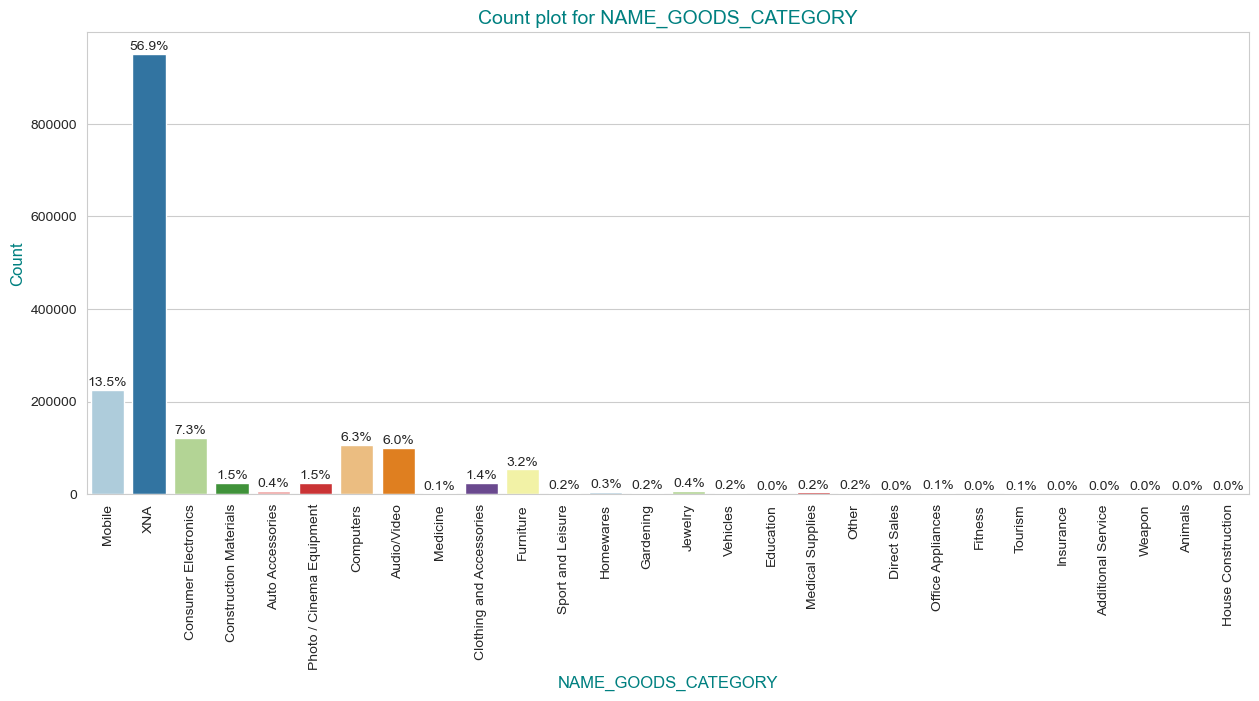

In [111]:
cat_univariate_prev('NAME_GOODS_CATEGORY', figsize= [15,6], xtick_ro= 90)

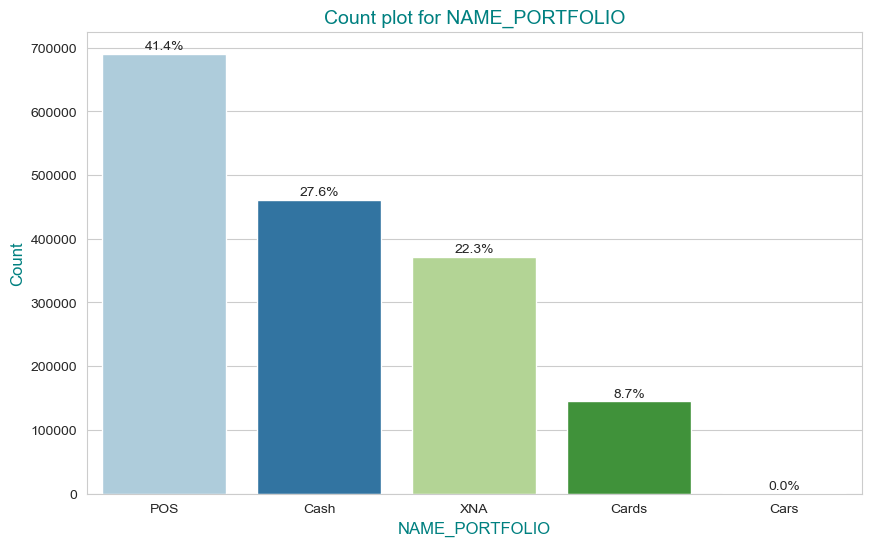

In [112]:
cat_univariate_prev('NAME_PORTFOLIO')

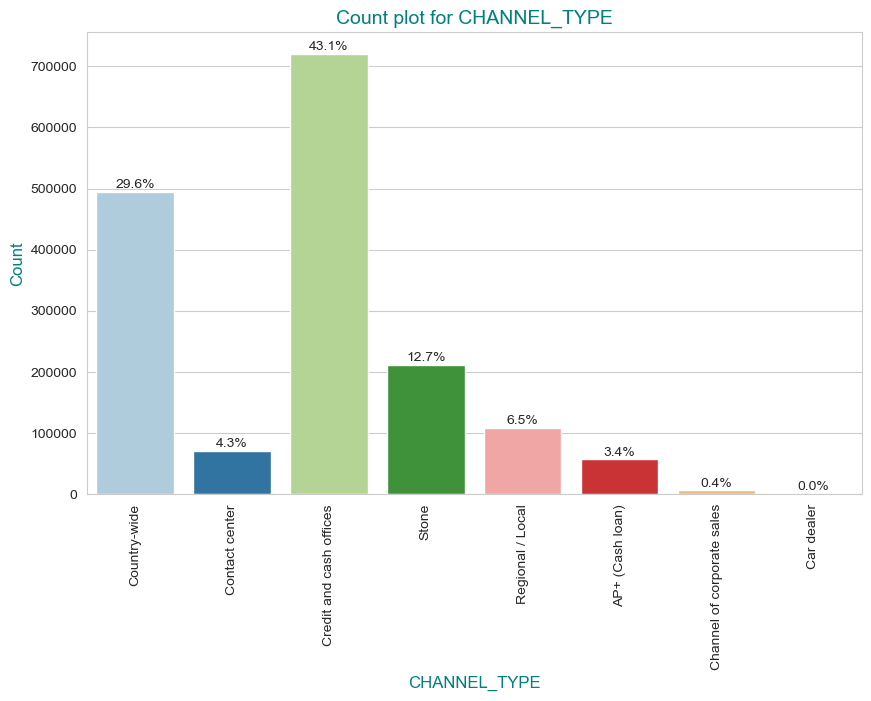

In [113]:
cat_univariate_prev('CHANNEL_TYPE', xtick_ro= 90)

### Most of the clients on the previous application were acquired through 'Credit and Cash office'.

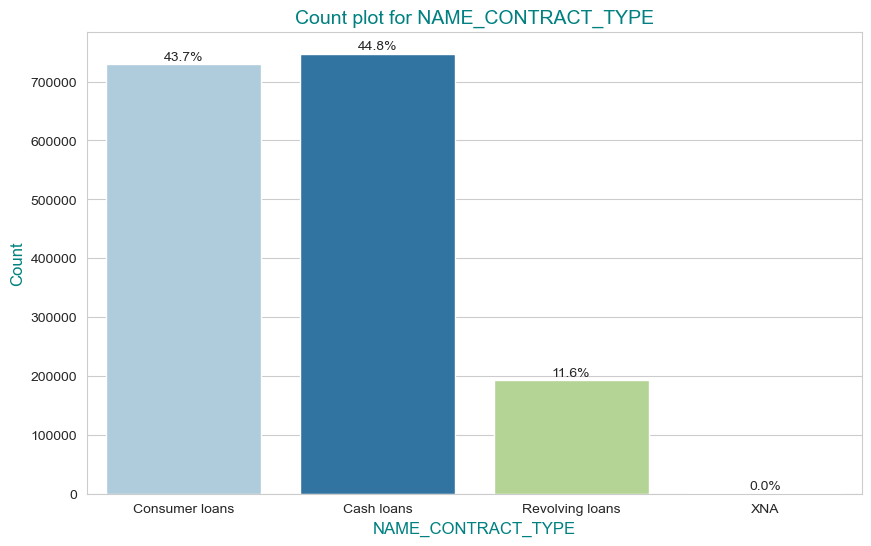

In [114]:
cat_univariate_prev('NAME_CONTRACT_TYPE')

Contract Type Distribution
Let’s analyze the distribution of contract types in the dataset. 
Contract types indicate the various types of loans offered by the company and their respective percentages:

Cash loans: The most common contract type, accounting for 43.7% of all contracts.
Consumer loans: A significant portion of contracts, making up 44.8% of the total.
Revolving loans: Less common, representing 11.6% of contracts. Typically associated with credit cards or lines of credit.
XNA: An extremely rare category, making up only 0.0% of the contracts. The exact meaning of “XNA” is unclear.

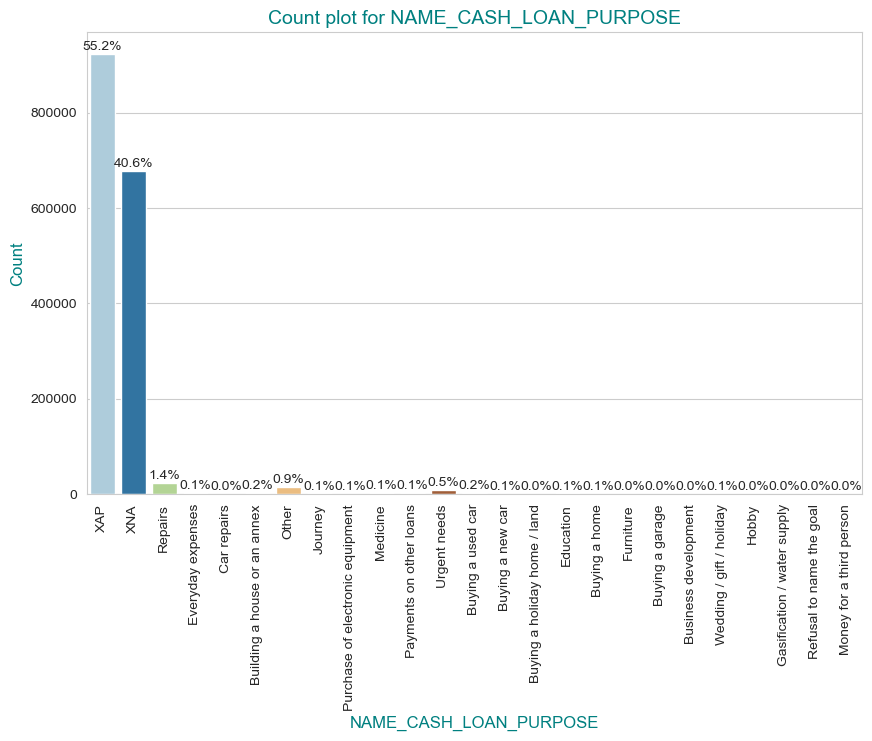

In [115]:
cat_univariate_prev('NAME_CASH_LOAN_PURPOSE', xtick_ro= 90)

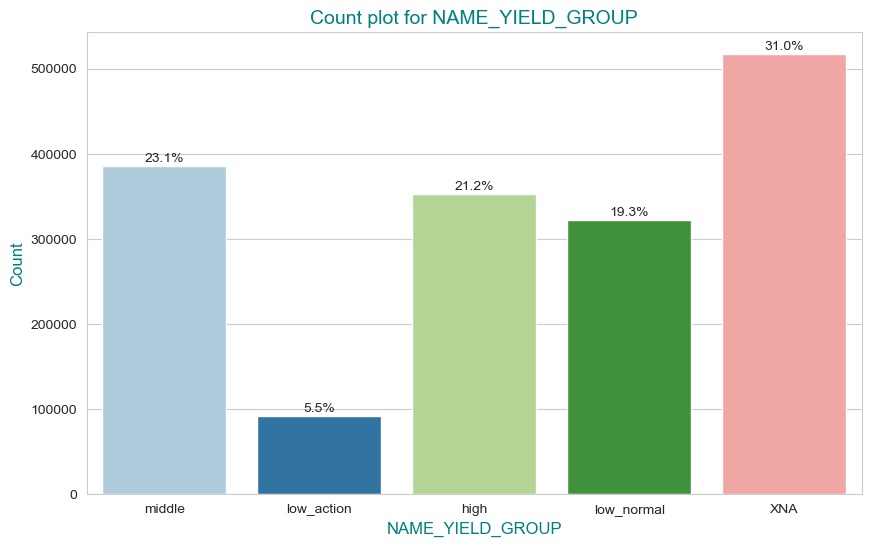

In [116]:
cat_univariate_prev('NAME_YIELD_GROUP')

###  Most group interest rate lies in middle.

# Bivariate Analaysis

<Figure size 2500x2200 with 0 Axes>

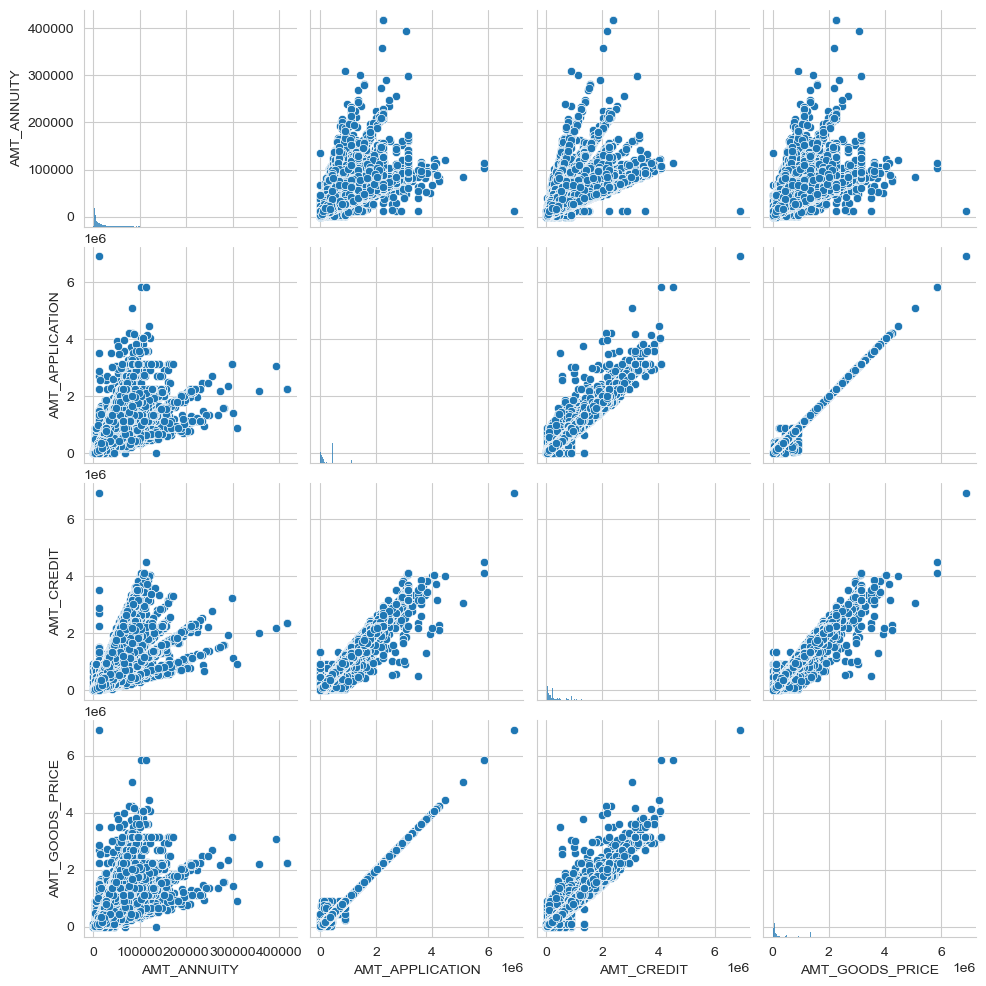

In [119]:
plt.figure(figsize= [25,22])
sns.pairplot(df2[['AMT_ANNUITY' ,'AMT_APPLICATION', 'AMT_CREDIT','AMT_GOODS_PRICE']], dropna= True)
plt.show()

# Insights on previous_application_data

* Day of the Week Impact:

Loans submitted on Saturdays exhibit the highest likelihood of approval. This temporal pattern suggests a potential correlation between the day of the week and loan approval rates. Further investigation into the reasons behind this trend could inform optimization strategies for loan processing.

* Client Type and Approval Rates:

Repeater clients dominate the majority of previous loan applications, while new clients have no recorded instances of canceled status. The prevalence of unused offers among Repeater customers raises questions about their ease of loan approval. Some Repeater clients may have approved loans that were later left unused, indicating a potential opportunity for the bank to refine its loan offerings to better match client needs.

* Loan Type and Refusal Rates:

For POS and CARDS, there are no instances of unused loans. Refusal rates are higher for Cash or Card transactions, while POS transactions show a significantly lower likelihood of refusal. This underscores the importance of considering the type of loan when assessing approval probabilities. The bank may want to refine its criteria for Cash and Card loans, potentially making them more aligned with the successful POS model.

* Goods Category Influence:

The majority of loan applications are associated with the 'Mobile goods' category. Notably, applications related to Mobiles, Computers, Audio/Video, and Furniture have a considerably higher chance of approval. Recognizing these trends enables the bank to prioritize and streamline its approval process for applications in these specific goods categories.

* Client Acquisition Channels:

Clients acquired through 'Credit and Cash offices' face the highest likelihood of refusal and cancellation. On the contrary, clients acquired through the 'Country-wide' channel are less likely to experience cancellations. 'Contact center' channel clients also face lower chances of loan approval. These insights highlight the need for a nuanced approach in assessing applications based on the client acquisition channel. The bank should consider refining its criteria for clients acquired through 'Credit and Cash offices' while acknowledging the higher approval rates for 'Country-wide' channel clients.

# Machine Learning Models

# application_data

# Split the data into train and test

In [156]:
# Split data into x & y 
x=df1.drop('TARGET',axis=1)
y=df1[["TARGET"]]

In [157]:
# split data for trainign & testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [158]:
print(x_train.shape)
print(x_test.shape)

(215256, 44)
(92253, 44)


In [159]:
y_train.value_counts()

TARGET
0         197908
1          17348
dtype: int64

  In risk analytics, specifically in the context of credit risk assessment:

* 1 typically represents customers who are classified as “high risk” or those who at higher risk of getting loan default.
* 0 typically represents customers who are classified as “low risk” or those who have a lower risk of defaulting

These values are commonly used to create a binary classification of customers based on their creditworthiness or the likelihood of defaulting on a loan.

In [160]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [151]:
nan_values = df1.isna().sum()



In [147]:
df1["CNT_FAM_MEMBERS"] = pd.to_numeric(df1['CNT_FAM_MEMBERS'], errors='coerce')

In [152]:
print(nan_values[nan_values > 0])

Series([], dtype: int64)


In [154]:
df1.dropna(inplace=True)

In [161]:
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [162]:
y_smote.value_counts()

TARGET
0         197908
1         197908
dtype: int64

In [163]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({'TARGET': 1})
SMOTE Classes Counter({'TARGET': 1})


# Logistic regression

In [164]:
# import the Logistic regression model 
from sklearn.linear_model import LogisticRegression 
## initiallisation of the model
LR=LogisticRegression()
# train model model with x_train, y_train
LR.fit(x_smote,y_smote)

LogisticRegression()

In [165]:
# Predict output for x_test
y_pred=LR.predict(x_test)

# Model Evaluation

In [166]:
## evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,f1_score


In [167]:
#accuracy_score
accuracy_score(y_test,y_pred)*100

56.913054318016755

In [168]:

# classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.57      0.71     84776
           1       0.10      0.55      0.17      7477

    accuracy                           0.57     92253
   macro avg       0.52      0.56      0.44     92253
weighted avg       0.87      0.57      0.67     92253



In [169]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[48412, 36364],
       [ 3385,  4092]], dtype=int64)

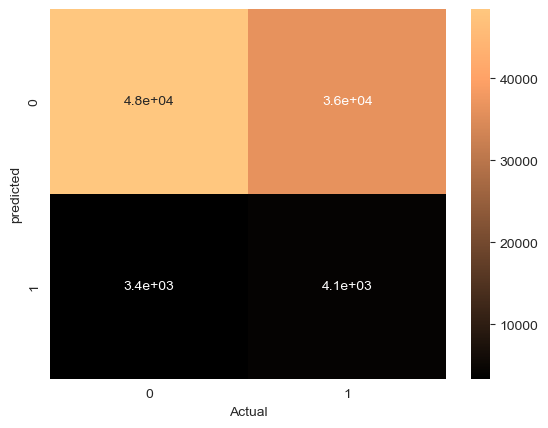

In [170]:
plt.figure()
sns.heatmap(cm,annot=True,cmap='copper')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

# KNN - K-Nearest neighbour

In [171]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_smote,y_smote)
y_pred=KNN.predict(x_test)

# Model Evaluation

In [172]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [173]:
# accuracy_score
accuracy_score(y_test,y_pred)*100

74.30869456819832

In [174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85     84776
           1       0.09      0.25      0.14      7477

    accuracy                           0.74     92253
   macro avg       0.51      0.52      0.49     92253
weighted avg       0.86      0.74      0.79     92253



In [175]:
# confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[66696, 18080],
       [ 5621,  1856]], dtype=int64)

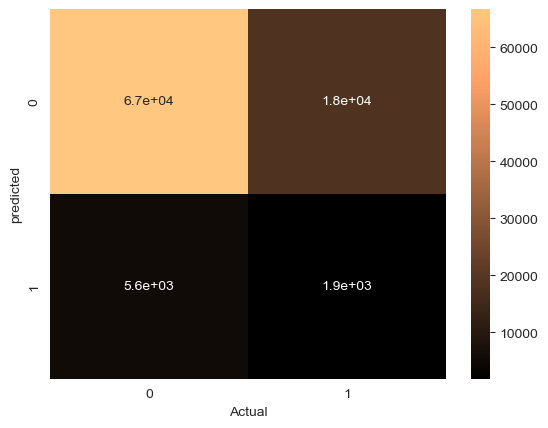

In [176]:
plt.figure()
sns.heatmap(cm,annot=True,cmap='copper')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

# Support Vector Classifier

In [ ]:
# Support Vector Classifier Model
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_smote, y_smote)

In [ ]:
# Predict output for x_test
y_pred=svclassifier.predict(x_test)

# Model evaluation

In [ ]:
# evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,f1_score

In [ ]:
#accuracy_score
accuracy_score(y_test,y_pred)*100

In [ ]:
# classification_report
print(classification_report(y_test,y_pred))

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
plt.figure()
sns.heatmap(cm,annot=True,cmap='copper')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

# Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier() 
dt.fit(x_smote,y_smote)
y_pred=dt.predict(x_test)


In [ ]:
y_train_predict=dt.predict(x_train)#predicting training data to check training performance 
y_train_predict


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report


In [ ]:
# testing accuracy
accuracy_score(y_test,y_pred)*100
print(classification_report(y_test,y_pred))


# Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_smote,y_smote)
y_pred=rf.predict(x_test)

# Model Evaluation

In [ ]:
accuracy_score(y_test,y_pred)*100

In [ ]:
print(classification_report(y_test,y_pred))

# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
model_bag=BaggingClassifier(base_estimator=KNN,n_estimators=50)
model_bag.fit(x_smote,y_smote)
y_pred=model_bag.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)*100

In [ ]:
print(classification_report(y_test,y_pred))

# Gradient boosting

In [ ]:
# Model building
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=120)
gb.fit(x_smote,y_smote)
y_pred=gb.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)*100

In [ ]:
print(classification_report(y_test,y_pred))

# XG Boosting

In [ ]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [ ]:
accuracy_score(y_test,y_pred)*100

In [ ]:
print(classification_report(y_test,y_pred))

# Techniques Used


* Model Selection:

Choosing the right machine learning algorithm or combination of algorithms can be a significant challenge. In the context of classification tasks, such as predicting whether a client will subscribe to a term deposit or not, commonly explored options include XGBoost, Random Forest, and Linear Regression models.

* Smote:

SMOTE helps in improving the performance of machine learning models when trained on imbalanced datasets because it increases the representation of the minority class. This can lead to better model generalization and predictive accuracy for the minority class.

* Ensemble Techniques:

Leveraging ensemble methods, such as stacking or blending multiple models like XGBoost, Random Forest, and Gradient Boosting, can significantly enhance predictive accuracy.

* Feature Engineering for Categorical Data:

Label encoding and target encoding methods are utilized to convert categorical variables into an appropriate format for modeling purposes.  

